# Выпускной проект. Банки — Сегментация пользователей по потреблению

**Цель:** сегментировать пользователей по количеству потребляемых продуктов, проанализировав клиентов регионального банка и обратив особое внимание на отток.

**План работы:**
1. Подключить необходимые библиотеки для работы
2. Изучить общую информацию о наборе данных:
* загрузить файл
* посмотреть количество данных, их тип, пропущенные значения, дубликаты, название столбцов
* сделать вывод
3. Провести предварительную обработку данных:
* переименовать столбцы в соответствии с правилами
* изменить тип данных
* обработать дубликаты, предварительно исследовав их природу
* обработать пропуски, предварительно исследовав их природу
* создать новые столбцы
* сделать вывод
4. Провести исследовательский анализ данных:
* сколько всего пользователей
* изучить портрет типичного клиента банка с помощью мер центральной тенденции
* разделить пользователей на группы по количеству потребляемых продуктов.
* исследовать отличительные черты получившихся групп
* сравнить портреты типичного пользователя в получившихся группах
* исследовать отток клиентов в разрезе значений или диапазонов значений
* сравнить относительные показатели оттока в сформированных группах
* провести корреляционный анализ показателей с целью выявления возможных причин оттока пользователей в банке в целом и по группам
* сделать вывод
5. Провести статистический анализ данных:
* проверить гипотезу различия возраста между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним:
    + сформулировать нулевую и альтернативные гипотезы
    + обоснованно выбрать статистический критерий проверки гипотезы
    + непосредсвенно проверить гипотезу выбранным критерием и сделать выводы
* проверить гипотезу различия между сформированными группами клиентов по еще одной отличительной черте:
    + сформулировать нулевую и альтернативные гипотезы
    + обоснованно выбрать статистический критерий проверки гипотезы
    + непосредсвенно проверить гипотезу выбранным критерием и сделать выводы
6. Написать промежуточный итог с обоснованием выбора показателей для сегментации пользователей
7. Провести сегментацию пользователей на основе выделенных показателей
* сформировать на основе получившихся отличительных черт более компактные группы
* посчитать ключевые показатели
* выделить приоритетные показатели
8. Написать общий вывод и дать рекомендации для заказчика в виде презентации

**Описание данных**

Датасет содержит данные о клиентах банка.

In [1]:
!pip install phik

     |████████████████████████████████| 686 kB 1.1 MB/s eta 0:00:01


In [2]:
#подключение библиотек
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np
import math as mth
import phik

from phik import resources
from phik.binning import bin_data
from phik.report import plot_correlation_matrix


import warnings
warnings.filterwarnings("ignore")

In [3]:
#загрузка набора данных
try:
    df = pd.read_csv('dataset.csv')
except:
    df = pd.read_csv('https://dataset.csv')

### Общая информация о наборе данных

In [4]:
#просмотр данных
df.head()

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


In [5]:
#просмотр общей информации о наборе данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


In [6]:
#подсчет пропусков в процентном соотношении
df.isna().sum() / df.shape[0] * 100

USERID            0.00
score             0.00
city              0.00
gender            0.00
age               0.26
equity            0.00
balance          22.95
products          0.00
credit_card       0.00
last_activity     0.00
EST_SALARY        0.00
churn             0.00
dtype: float64

In [7]:
#проверка на явные дубликаты
df.duplicated().sum()

0

Набор данных содержит 10000 строк и 12 столбцов. 4 столбца содержат данные типа float64, 6 - int64 и 2 object. Имеются пропуски в двух столбцах, в столбце age пропущенных значений всего 0.26%, а вот в столбце balance значительное количество пропущенных значений - почти 23%.  Названия столбцов USERID, EST_SALARY нужно привести к змеиному регистру. Явных дубликатов нет. У столбцов score и age можно поменять тип на int. Кроме того, столбцы credit_card, last_activity и churn по своей природе не числовые, но менять тип этих не будем для удобства работы с ними в дальнейшем. 

### Предварительная обработка данных

#### Замена названий столбцов

In [8]:
#замена названий столбцов
df = df.rename(columns={'USERID': 'user_id', 'EST_SALARY': 'est_salary'})

#### Проверка на дубликаты

Явных дубликатов в наборе данных не было выявлено. Проверим, нет ли неявных. В первую очередь посмотрим на строковые переменые - city, gender, так как там возможны опечатки или различные сокращения одних и тех же городов.

In [9]:
#уникальные названия населенных пунктов
df['city'].unique()

array(['Рыбинск', 'Ярославль', 'Ростов'], dtype=object)

In [10]:
#уникальные значения пола
df['gender'].unique()

array(['Ж', 'М'], dtype=object)

В числовых столбцах совпадения допустимы кроме столбца с идентификатором пользователя. Поэтому проверим этот столбец, смотрим сразу количество уникальных значений, так как предполагаем их около 10000.

In [11]:
#количество уникальных значений
print(df['user_id'].nunique())
df['user_id'].duplicated().sum()

9927


73

К сожалению, дубликаты по столбцу появились. Посмотрим, на эти строки. 

In [12]:
#список дублируемых ид
user_id_l = list(df.loc[df['user_id'].duplicated()]['user_id'])
#посмотрим набор данных с дулируемыми ид
df[df['user_id'].isin(user_id_l)].sort_values(by='user_id').head(10)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1893,116540,883.0,Рыбинск,Ж,55.0,1,362756.49,3,0,1,175920.48,1
7694,116540,887.0,Ярославль,Ж,38.0,0,NaN,1,0,1,119247.61,0
7542,117943,880.0,Ярославль,Ж,40.0,0,NaN,1,1,0,137718.93,0
4866,117943,855.0,Рыбинск,Ж,32.0,6,1036832.93,4,1,1,107792.71,1
5896,120258,905.0,Ярославль,М,30.0,0,NaN,1,1,1,146427.96,0
5863,120258,908.0,Рыбинск,Ж,38.0,4,2213581.63,2,0,1,160327.77,1
1411,123461,829.0,Ярославль,Ж,59.0,0,96222.44,2,0,1,102771.55,1
8638,123461,934.0,Рыбинск,М,34.0,0,NaN,2,1,0,291619.27,0
8164,124450,859.0,Ярославль,Ж,38.0,6,516811.20,1,1,1,95144.63,1
9775,124450,758.0,Рыбинск,Ж,36.0,0,73574.07,2,0,1,79963.59,0


Видим, что для одинаковых ид различаются города клиентов, скорее всего, уникальность ид сохраняется в рамках одного города. Проверим, что вместе с городом уже не будет дубликатов.

In [13]:
df[['user_id', 'city']].duplicated().sum()

0

Добавление города клиента делает строки неповторяющимися. Таким образом, неявных дубликатов тоже нет.

#### Пропущенные значения

In [14]:
#Посмотрим на пропуски столбца age
age_isna = df.loc[df['age'].isna()]
age_isna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 1247 to 9819
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        26 non-null     int64  
 1   score          26 non-null     float64
 2   city           26 non-null     object 
 3   gender         26 non-null     object 
 4   age            0 non-null      float64
 5   equity         26 non-null     int64  
 6   balance        10 non-null     float64
 7   products       26 non-null     int64  
 8   credit_card    26 non-null     int64  
 9   last_activity  26 non-null     int64  
 10  est_salary     26 non-null     float64
 11  churn          26 non-null     int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 2.6+ KB


In [15]:
age_isna.describe()

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,26.00000,26.000000,0.0,26.000000,1.000000e+01,26.000000,26.000000,26.000000,26.000000,26.000000
mean,194637.50000,855.153846,NaN,1.384615,1.250034e+06,1.346154,0.769231,0.769231,178585.199231,0.038462
std,31310.54801,83.418316,NaN,1.961161,2.265235e+06,0.561591,0.429669,0.429669,175135.552768,0.196116
min,127440.00000,663.000000,NaN,0.000000,1.715102e+05,1.000000,0.000000,0.000000,55073.630000,0.000000
25%,185142.00000,827.500000,NaN,0.000000,2.523268e+05,1.000000,1.000000,1.000000,77807.760000,0.000000
50%,208447.00000,888.500000,NaN,0.000000,4.173611e+05,1.000000,1.000000,1.000000,142598.860000,0.000000
75%,219224.25000,919.250000,NaN,3.000000,1.039439e+06,2.000000,1.000000,1.000000,176991.690000,0.000000
max,228075.00000,942.000000,NaN,5.000000,7.601719e+06,3.000000,1.000000,1.000000,922080.250000,1.000000


In [16]:
df.describe()

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,10000.00000,10000.000000,9974.000000,10000.000000,7.705000e+03,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000
mean,171814.71260,848.699400,42.734409,2.627600,8.277943e+05,1.870100,0.680400,0.523500,1.478669e+05,0.182000
std,33708.23812,65.448519,12.179971,1.980836,1.980614e+06,0.792647,0.466345,0.499472,1.393885e+05,0.385864
min,94561.00000,642.000000,18.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,2.546300e+03,0.000000
25%,142810.25000,802.000000,33.000000,0.000000,2.955542e+05,1.000000,0.000000,0.000000,7.525190e+04,0.000000
50%,172728.00000,853.000000,40.000000,3.000000,5.242722e+05,2.000000,1.000000,1.000000,1.196581e+05,0.000000
75%,201261.75000,900.000000,51.000000,4.000000,9.807058e+05,2.000000,1.000000,1.000000,1.745005e+05,0.000000
max,229145.00000,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.000000,1.000000,1.395064e+06,1.000000


Практически в половине случаев у клиентов с пропущенным возрастом пропуски также наблюдаются и в balance. Кроме того, таких клиентов всего 26, что составляет менее 0.26% от всего количества данных, то удаление такого количества данных не повлияет на результат исследования.

In [17]:
df = df.dropna(subset=['age']).reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9974 entries, 0 to 9973
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        9974 non-null   int64  
 1   score          9974 non-null   float64
 2   city           9974 non-null   object 
 3   gender         9974 non-null   object 
 4   age            9974 non-null   float64
 5   equity         9974 non-null   int64  
 6   balance        7695 non-null   float64
 7   products       9974 non-null   int64  
 8   credit_card    9974 non-null   int64  
 9   last_activity  9974 non-null   int64  
 10  est_salary     9974 non-null   float64
 11  churn          9974 non-null   int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 935.2+ KB


In [18]:
df['balance'].isna().sum() / len(df) * 100

22.849408462001204

Пропусков в столбце balance значительно больше, чем было в age - почти 23%. Поэтому удаление четверти всех данных здесь не подойдет. Попробуем найти закономерности в других столбцах у клиентов с незаполненным балансом.

 
Для этого сравним данные с пропуском со всем набором данных по всем признакам.

In [19]:
#датафрейм с пропущенными значениями в столбце balance
balance_isna = df.loc[df['balance'].isna()]
balance_isna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2279 entries, 2 to 9971
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        2279 non-null   int64  
 1   score          2279 non-null   float64
 2   city           2279 non-null   object 
 3   gender         2279 non-null   object 
 4   age            2279 non-null   float64
 5   equity         2279 non-null   int64  
 6   balance        0 non-null      float64
 7   products       2279 non-null   int64  
 8   credit_card    2279 non-null   int64  
 9   last_activity  2279 non-null   int64  
 10  est_salary     2279 non-null   float64
 11  churn          2279 non-null   int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 231.5+ KB


In [20]:
#функция диаграмм размаха числовых столбцов двух датасетов в сравнении
def compare_box(df1, df2, column, num_col_label, title1, title2):
    fig, ax = plt.subplots(1, 2, figsize=(16, 9))
    fig.suptitle('Распределение столбца ' + num_col_label)

    ax1 = sns.boxplot(data = df1, y= df1[column], ax=ax[0])
    ax1.set(ylabel=num_col_label, title=title1) 
    
    ax2 = sns.boxplot(data = df2, y= df2[column], ax=ax[1])
    ax2.set(ylabel=num_col_label, title=title2) 
    
    plt.show()
   

In [21]:
#функция для построения гистограмм числовых столбцов двух датасетов в сравнении
def compare_hist(df1, df2, column, num_col_label, title1, title2, discr=False):
    fig, ax = plt.subplots(1, 2, figsize=(16, 9))
    fig.suptitle('Распределение столбца ' + num_col_label)

    ax1 = sns.histplot(df1[column], ax=ax[0], common_norm=False, stat='density', discrete=discr)
    ax1.set(xlabel=num_col_label, ylabel="Относительная частота", title=title1 )
    
    ax2 = sns.histplot(df2[column], ax=ax[1], common_norm=False, stat='density', discrete=discr)
    ax2.set(xlabel=num_col_label, ylabel="Относительная частота", title=title2)
    

In [22]:
#установка цветовой гаммы графиков
sns.set_style('whitegrid')
sns.set_palette(sns.color_palette('pastel'))

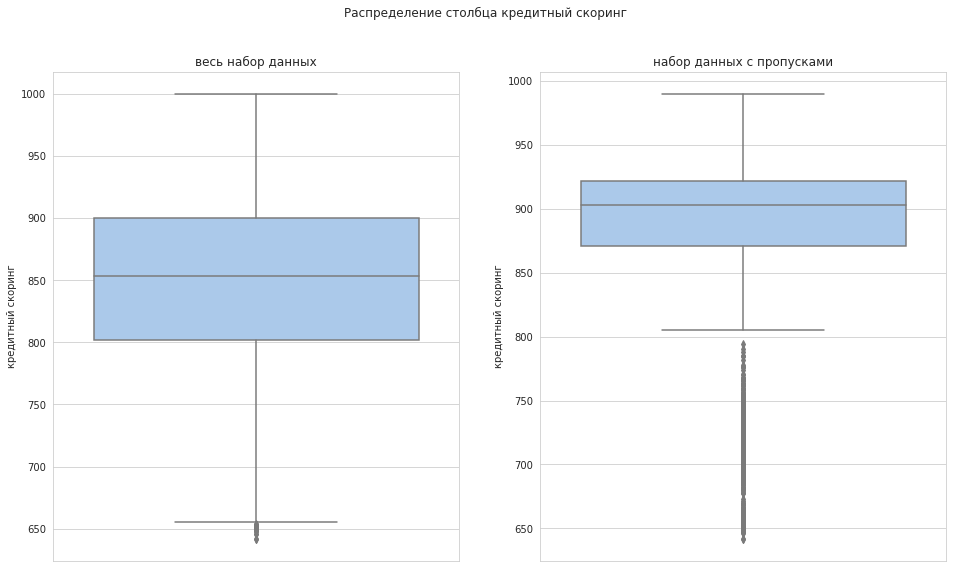

In [23]:
compare_box(df, balance_isna, 'score', 'кредитный скоринг', 'весь набор данных', 'набор данных с пропусками')

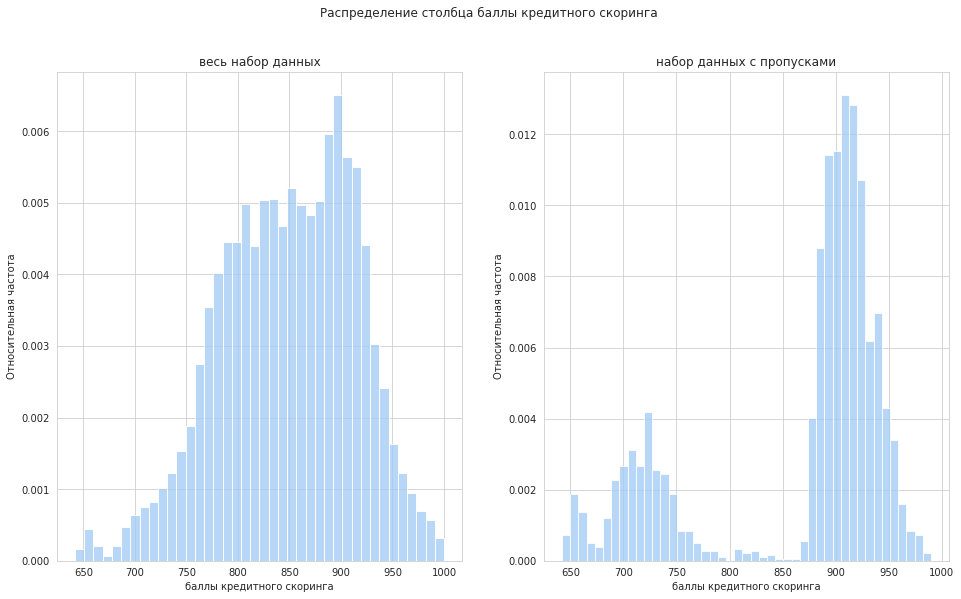

In [24]:
compare_hist(df, balance_isna, 'score', 'баллы кредитного скоринга', 'весь набор данных', 'набор данных с пропусками')

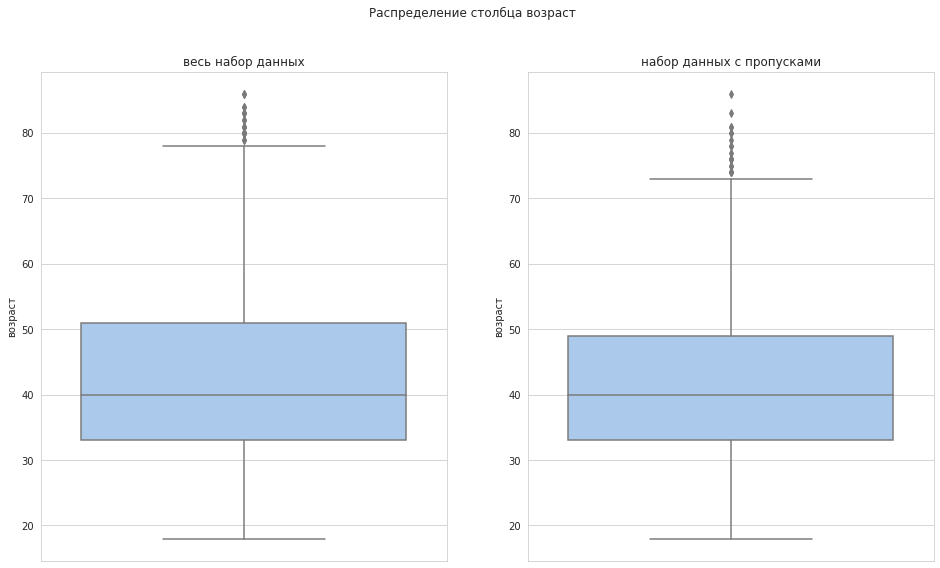

In [25]:
compare_box(df, balance_isna, 'age', 'возраст', 'весь набор данных', 'набор данных с пропусками')

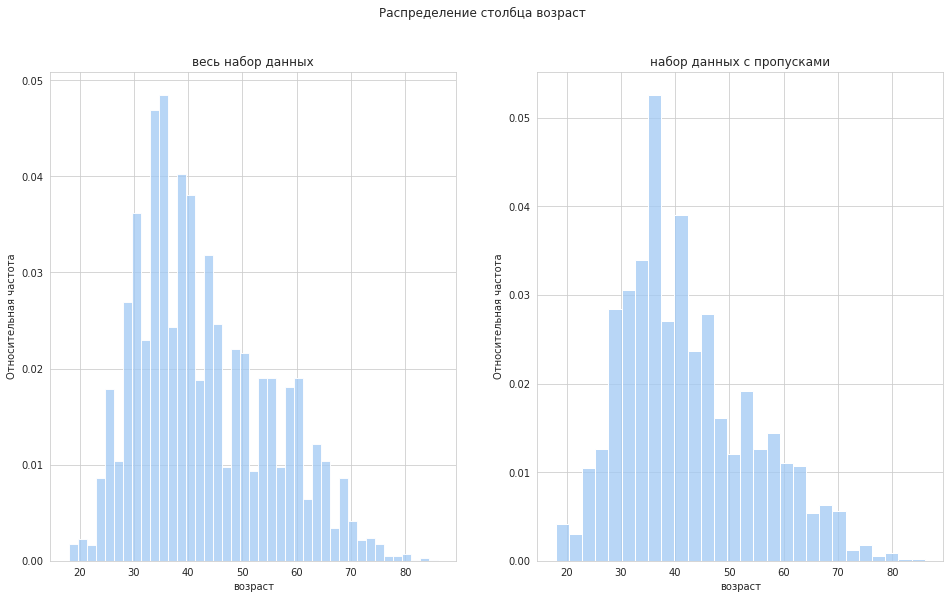

In [26]:
compare_hist(df, balance_isna, 'age', 'возраст', 'весь набор данных', 'набор данных с пропусками')

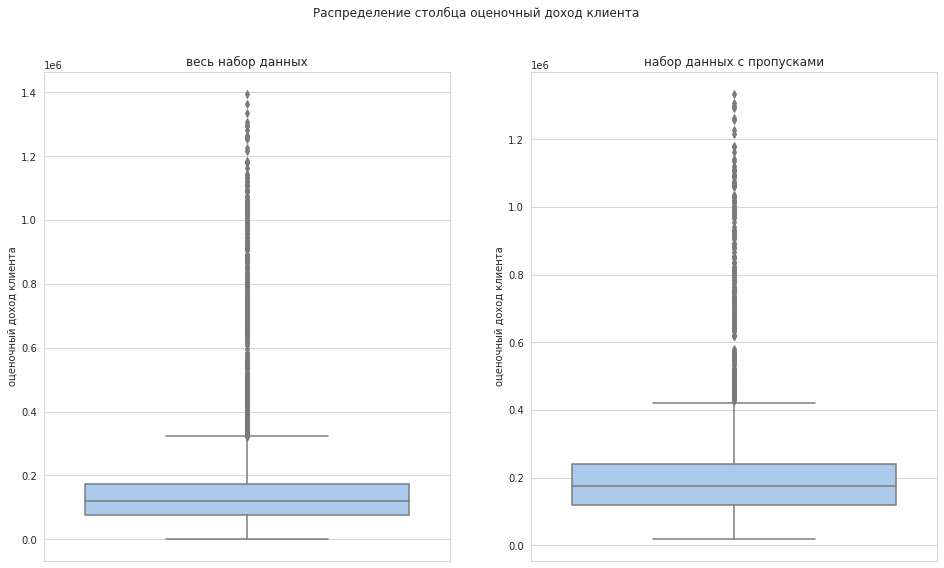

In [27]:
compare_box(df, balance_isna, 'est_salary', 'оценочный доход клиента', 'весь набор данных', 'набор данных с пропусками')

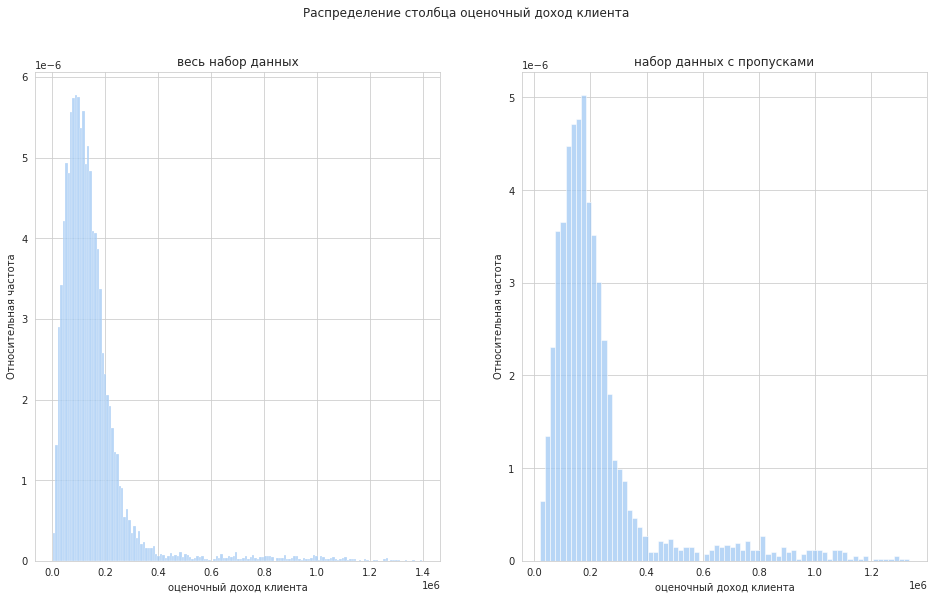

In [28]:
compare_hist(df, balance_isna, 'est_salary', 'оценочный доход клиента', 'весь набор данных', 'набор данных с пропусками')

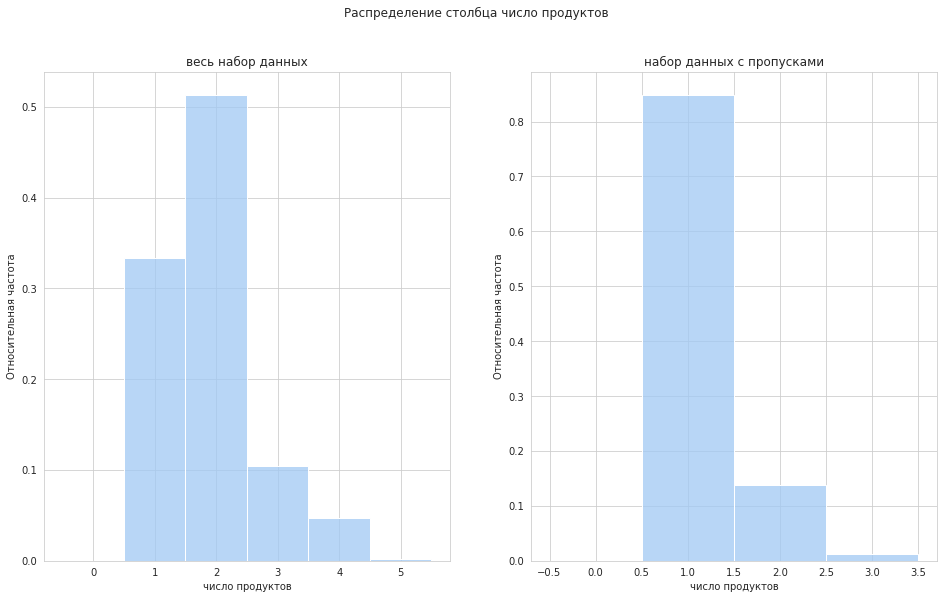

In [29]:
compare_hist(df, balance_isna, 'products', 'число продуктов', 'весь набор данных', 'набор данных с пропусками', discr=True)

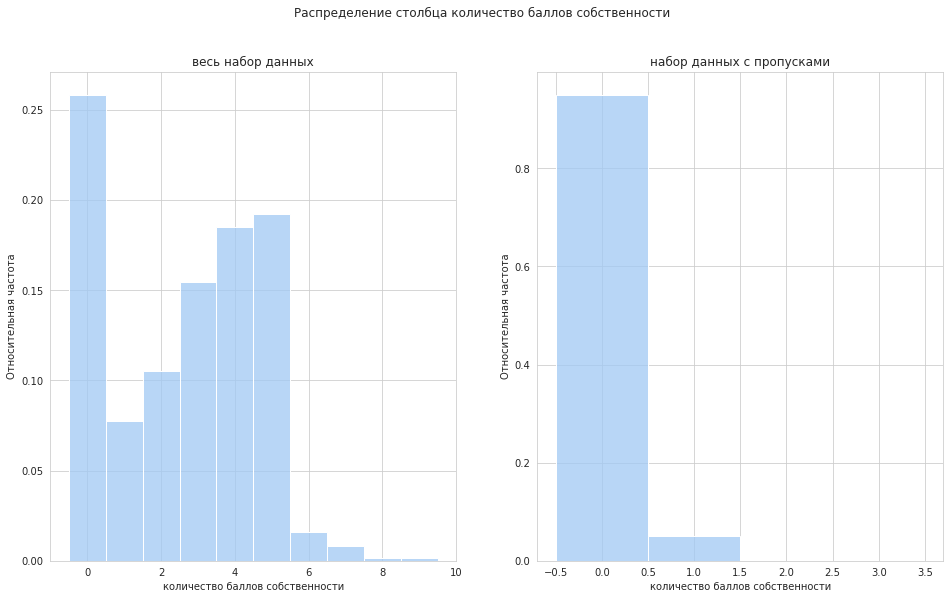

In [30]:
compare_hist(df, balance_isna, 'equity', 'количество баллов собственности', 'весь набор данных', 'набор данных с пропусками', discr=True)

Распределение признаков числовых величин по наборам данных: весь и только с пропусками в столбце balance различаются. По признаку score различие очевидно, для возраста и оценочного дохода распределения схожи, но в наборе данных с пропусками существенно меняются доля значений, сильно отличающихся от основной массы. 
  
Для признаков число продуктов и баллы собственности распределения также отличаются по количеству различных вариантов признака и соотношению этих признаков.
 
Посмотрим на соотношение значений в категориальных переменных. 

In [31]:
print('Весь набор данных:\n', df["credit_card"].value_counts(normalize=True))
print()
print('Набор данных с пропусками:\n', balance_isna["credit_card"].value_counts(normalize=True))

Весь набор данных:
 1    0.680168
0    0.319832
Name: credit_card, dtype: float64

Набор данных с пропусками:
 1    0.81527
0    0.18473
Name: credit_card, dtype: float64


In [32]:
#функция диаграмм размаха числовых столбцов двух датасетов в сравнении
def compare_count(column1, column2, num_col_label, title1, title2):
    fig, ax = plt.subplots(1, 2, figsize=(16, 9))
    fig.suptitle('Распределение столбца ' + num_col_label)

    ax1 = sns.barplot(y=column1, x=column1.index, ax=ax[0])
    ax1.set(xlabel=num_col_label, ylabel="Относительная частота", title=title1 )
    
    ax1 = sns.barplot(y=column2, x=column2.index, ax=ax[1])
    ax1.set(xlabel=num_col_label, ylabel="Относительная частота", title=title2 )
    

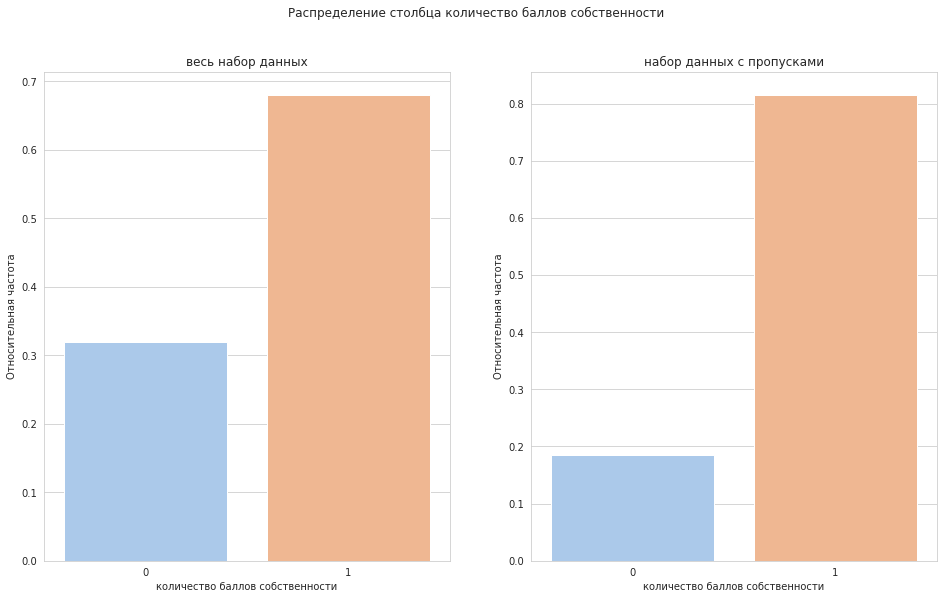

In [33]:
compare_count(df["credit_card"].value_counts(normalize=True), balance_isna["credit_card"].value_counts(normalize=True),
               'количество баллов собственности', 'весь набор данных', 'набор данных с пропусками')

Весь набор данных:
 М    0.500401
Ж    0.499599
Name: gender, dtype: float64

Набор данных с пропусками:
 М    0.55814
Ж    0.44186
Name: gender, dtype: float64



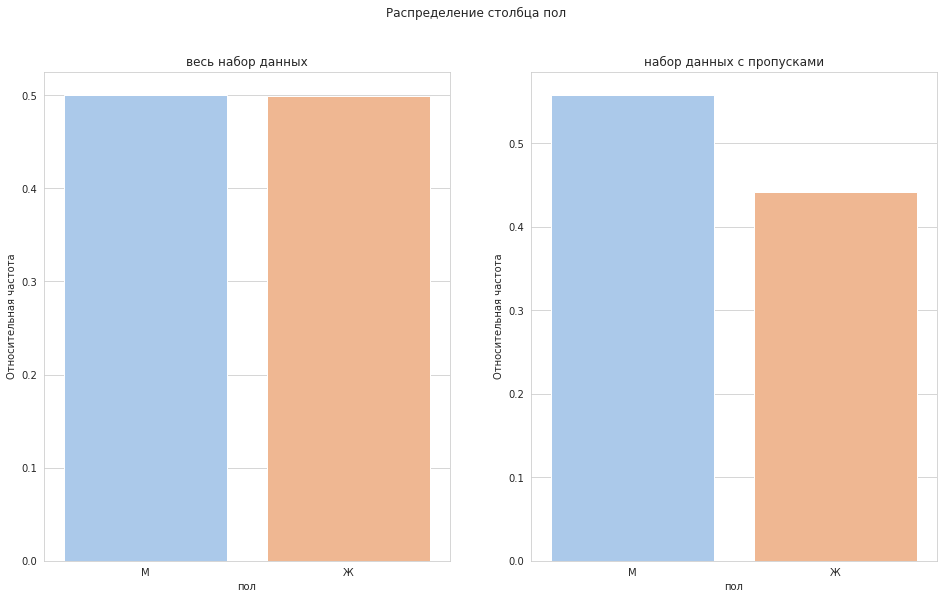

In [34]:
print('Весь набор данных:\n', df["gender"].value_counts(normalize=True))
print()
print('Набор данных с пропусками:\n', balance_isna["gender"].value_counts(normalize=True))
print()
compare_count(df["gender"].value_counts(normalize=True), balance_isna["gender"].value_counts(normalize=True),
               'пол', 'весь набор данных', 'набор данных с пропусками')

Весь набор данных:
 1    0.522859
0    0.477141
Name: last_activity, dtype: float64

Набор данных с пропусками:
 1    0.548925
0    0.451075
Name: last_activity, dtype: float64



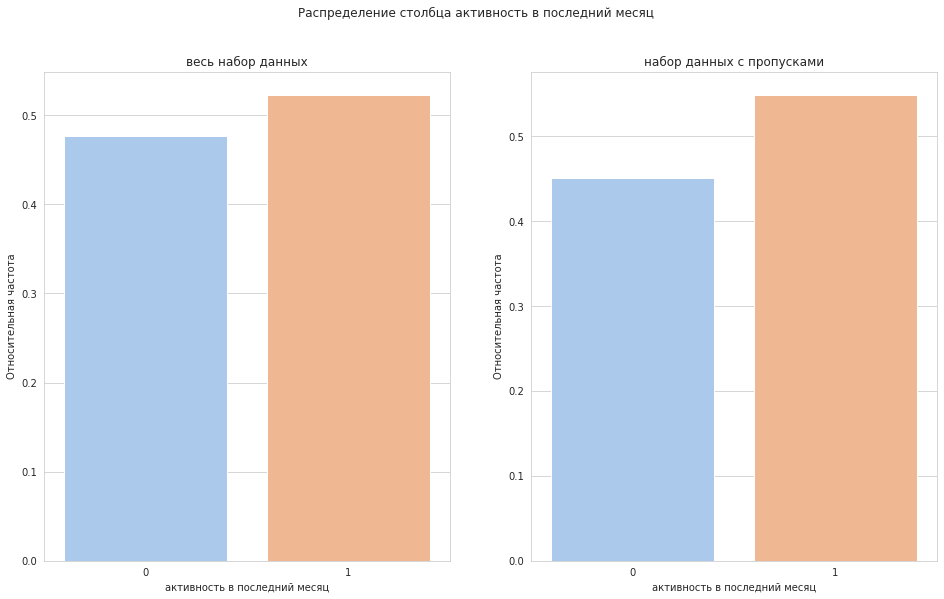

In [35]:
print('Весь набор данных:\n', df["last_activity"].value_counts(normalize=True))
print()
print('Набор данных с пропусками:\n', balance_isna["last_activity"].value_counts(normalize=True))
print()
compare_count(df["last_activity"].value_counts(normalize=True), balance_isna["last_activity"].value_counts(normalize=True),
               'активность в последний месяц', 'весь набор данных', 'набор данных с пропусками')

Весь набор данных:
 Ярославль    0.589031
Рыбинск      0.268999
Ростов       0.141969
Name: city, dtype: float64

Набор данных с пропусками:
 Ярославль    0.639754
Рыбинск      0.257130
Ростов       0.103115
Name: city, dtype: float64



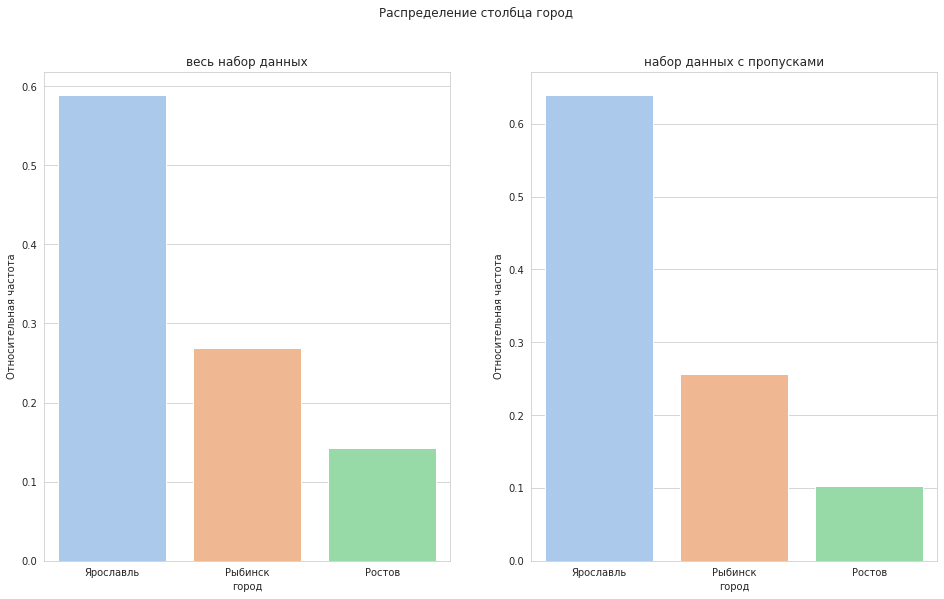

In [36]:
print('Весь набор данных:\n', df["city"].value_counts(normalize=True))
print()
print('Набор данных с пропусками:\n', balance_isna["city"].value_counts(normalize=True))
print()
compare_count(df["city"].value_counts(normalize=True), balance_isna["city"].value_counts(normalize=True),
               'город', 'весь набор данных', 'набор данных с пропусками')

Весь набор данных:
 0    0.817626
1    0.182374
Name: churn, dtype: float64

Набор данных с пропусками:
 0    0.994296
1    0.005704
Name: churn, dtype: float64



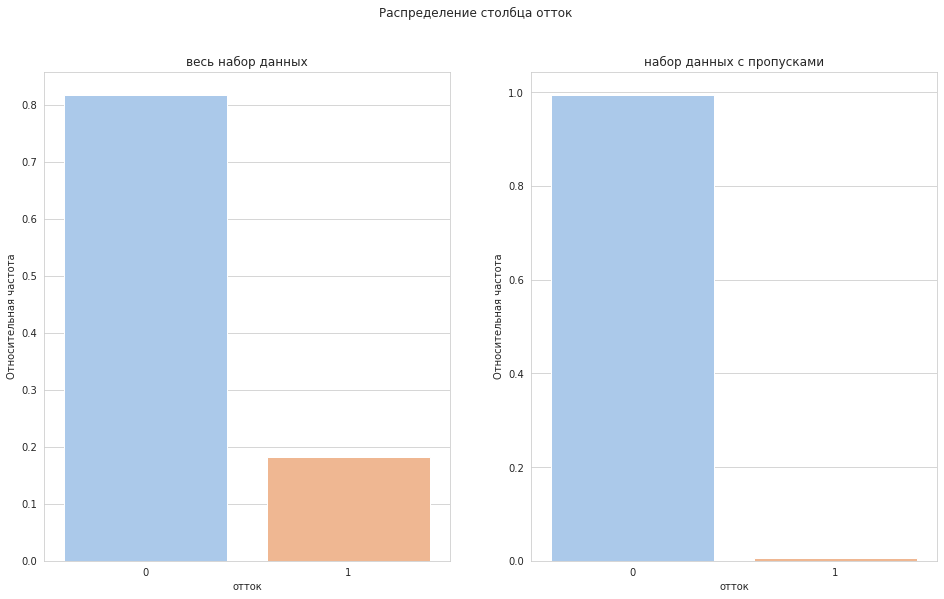

In [37]:
print('Весь набор данных:\n', df["churn"].value_counts(normalize=True))
print()
print('Набор данных с пропусками:\n', balance_isna["churn"].value_counts(normalize=True))
print()
compare_count(df["churn"].value_counts(normalize=True), balance_isna["churn"].value_counts(normalize=True),
               'отток', 'весь набор данных', 'набор данных с пропусками')

По категориальным признакам, за исключением пола, распределение схожее, но соотношение вариантов признака разное.

In [39]:
len(balance_isna.query('(equity == 0) & (products == 1) & (credit_card == 1)')) / len(balance_isna)

0.6586222027204914

In [40]:
balance_isna.query('(equity == 0) & (products == 1) & (credit_card == 1)').describe()

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,1501.000000,1501.000000,1501.000000,1501.0,0.0,1501.0,1501.0,1501.000000,1.501000e+03,1501.000000
mean,171413.522985,857.812125,41.023984,0.0,NaN,1.0,1.0,0.554297,2.307970e+05,0.005330
std,33363.963526,95.286729,11.754294,0.0,NaN,0.0,0.0,0.497209,2.043681e+05,0.072835
min,114182.000000,642.000000,18.000000,0.0,NaN,1.0,1.0,0.000000,2.027403e+04,0.000000
25%,142834.000000,747.000000,33.000000,0.0,NaN,1.0,1.0,0.000000,1.230993e+05,0.000000
50%,171885.000000,902.000000,39.000000,0.0,NaN,1.0,1.0,1.000000,1.761581e+05,0.000000
75%,199619.000000,922.000000,47.000000,0.0,NaN,1.0,1.0,1.000000,2.419120e+05,0.000000
max,229145.000000,986.000000,83.000000,0.0,NaN,1.0,1.0,1.000000,1.333687e+06,1.000000


In [41]:
balance_isna.describe()

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,2279.000000,2279.000000,2279.000000,2279.000000,0.0,2279.000000,2279.000000,2279.000000,2.279000e+03,2279.000000
mean,171904.885915,865.357174,42.093023,0.051338,NaN,1.163229,0.815270,0.548925,2.263454e+05,0.005704
std,33303.215270,89.553735,11.941551,0.226623,NaN,0.403713,0.388164,0.497710,1.998256e+05,0.075327
min,114182.000000,642.000000,18.000000,0.000000,NaN,0.000000,0.000000,0.000000,2.027403e+04,0.000000
25%,142992.500000,871.000000,33.000000,0.000000,NaN,1.000000,1.000000,0.000000,1.202174e+05,0.000000
50%,172304.000000,903.000000,40.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.743479e+05,0.000000
75%,201257.000000,922.000000,49.000000,0.000000,NaN,1.000000,1.000000,1.000000,2.403728e+05,0.000000
max,229145.000000,990.000000,86.000000,3.000000,NaN,3.000000,1.000000,1.000000,1.333687e+06,1.000000


Сравнительный анализ части данных с пропусками и всего набора данных не позволяет нам удалить пропуски в столбце balance, но и заменить значения этого столбца тоже не предоставляется возможным.

Поскольку без веских причин изменять данные не рекомедуется, столбец balance я оставлю без изменений. Однако, выделенная группа клиентов без указанного баланса с 1 продуктом от банка в виде кредитной карты и с нулевым количеством баллов собственности (назовем ее группа К) составляет 66% клиентов с пропущенным балансом. Описательная статистика клиентов с пропущенным балансом и группы К схожая, но так как к этой же группе нельзя отнести целых 34% клиентов, я не считаю, что их можно объединить в группу по этим трем показателям.

#### Распределение переменных

Посмотрим распределение числовых переменных.

In [42]:
#установка цветовой гаммы графиков
sns.set_style('whitegrid')
sns.set_palette(sns.color_palette('pastel'))

In [43]:
#функция для отображения распределения числовых столбцов
def num_distr(df, column, num_col_labels):
    fig, ax = plt.subplots(1, 2, figsize=(16, 9))
    fig.suptitle('Распределение столбца ' + num_col_labels)

    ax1 = sns.histplot(df[column], ax=ax[0], stat='density')
    ax1.set(xlabel=num_col_labels, ylabel="Относительная частота", title='Гистограмма столбца ' +  num_col_labels)
    
    
    ax2 = sns.boxplot(data = df, y= df[column], ax=ax[1])
    ax2.set(ylabel=num_col_labels, title='Диаграмма размаха столбца ' +  num_col_labels) 
    
    plt.show()
    print(df[column].describe())
    

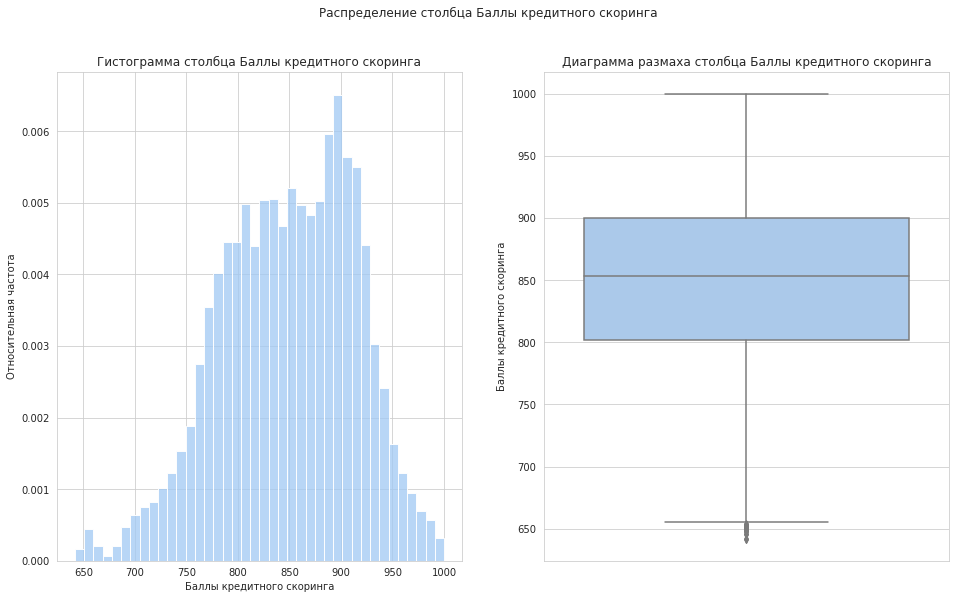

count    9974.000000
mean      848.682575
std        65.399720
min       642.000000
25%       802.000000
50%       853.000000
75%       900.000000
max      1000.000000
Name: score, dtype: float64


In [44]:
num_distr(df, 'score', 'Баллы кредитного скоринга')

In [45]:
#граница нижнего уса
q1, q3 = df['score'].quantile([0.25, 0.75])
iqr = q3 - q1

q1 - 1.5 * iqr

655.0

In [46]:
#доля выбросов
len(df.query('score < 655')) / len(df) * 100

0.33086023661519953

Значения столбца score распределены в отрезке от 642 до 1000. Медиана и среднее значение различаются, распределение явно ассиметричное. 50% всех значений попадают в промежуток от 802 до 900. 

Поскольку кредитный рейтинг - это шкала с границами диапазона, в нашем случае 0-1024, то любое значение внутри этого диапазона не является выбросом.

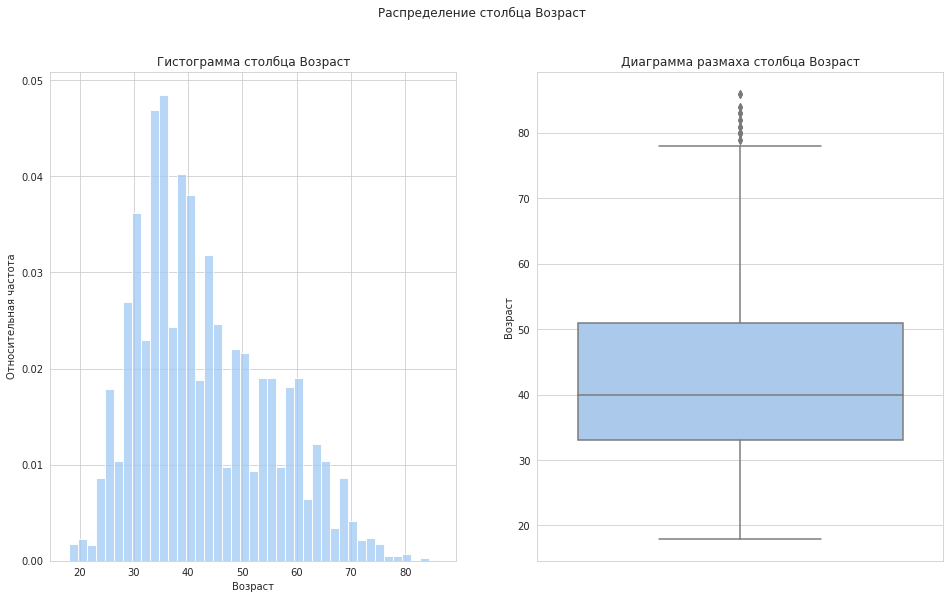

count    9974.000000
mean       42.734409
std        12.179971
min        18.000000
25%        33.000000
50%        40.000000
75%        51.000000
max        86.000000
Name: age, dtype: float64


In [47]:
num_distr(df, 'age', 'Возраст')

In [48]:
#граница верхнего уса

q1, q3 = df['age'].quantile([0.25, 0.75])
iqr = q3 - q1

q3 +1.5 * iqr

78.0

In [49]:
#доля выбросов
len(df.query('age >= 78')) / len(df) * 100

0.28072989773410867

Значения столбца age распределены в отрезке от 18 до 86. Медиана и среднее значение немного различаются. 50% всех значений попадают в промежуток от 33 до 51. 

Все значения укладываются в реалистичную шкалу диапазона возраста.

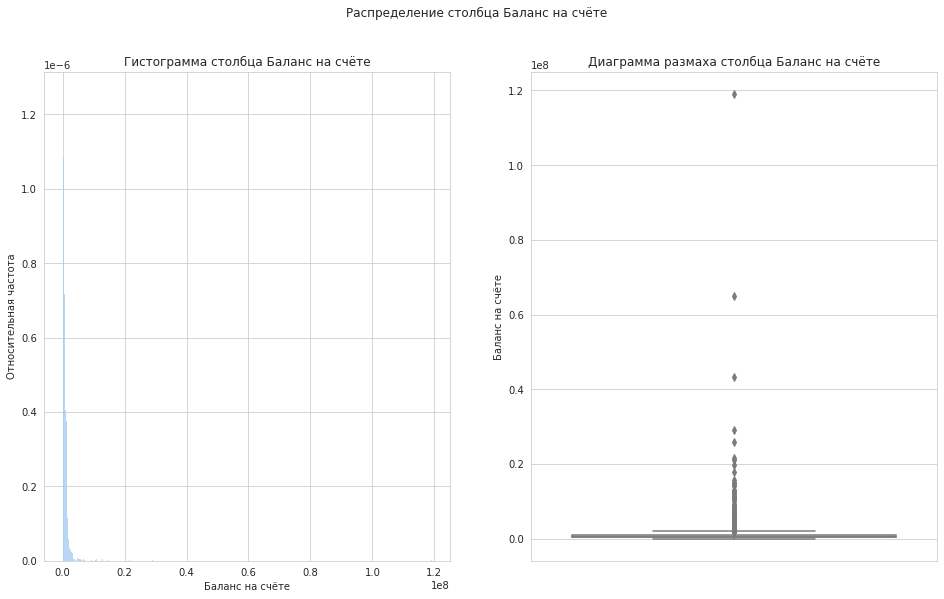

count    7.695000e+03
mean     8.272456e+05
std      1.980327e+06
min      0.000000e+00
25%      2.956987e+05
50%      5.242953e+05
75%      9.800512e+05
max      1.191136e+08
Name: balance, dtype: float64


In [50]:
num_distr(df, 'balance', 'Баланс на счёте')

In [51]:
#граница верхнего уса

q1, q3 = df['balance'].quantile([0.25, 0.75])
iqr = q3 - q1

q3 + 1.5 * iqr

2006579.9649999999

In [52]:
#доля выбросов
len(df.query('balance > 2006579')) / len(df) * 100

4.281130940445157

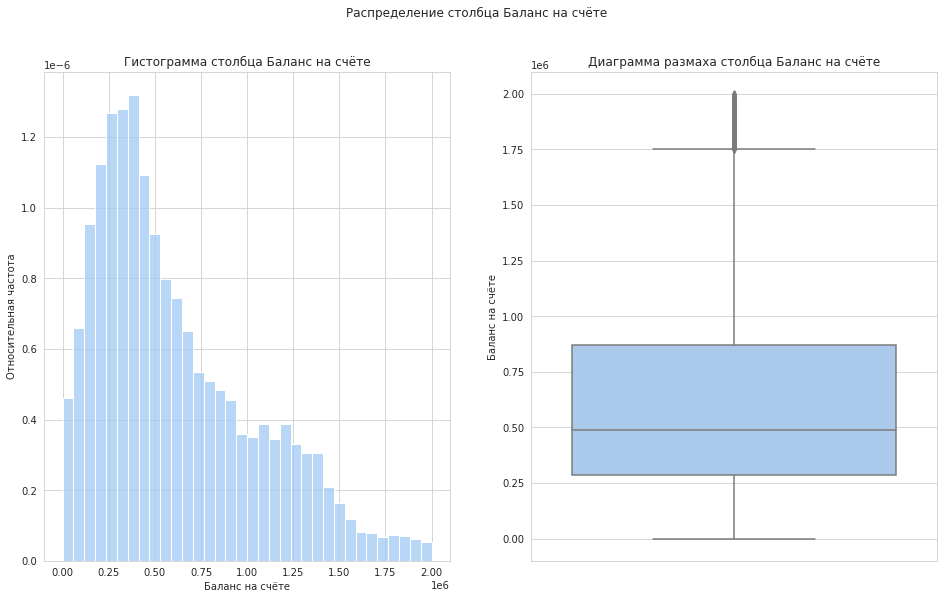

count    7.268000e+03
mean     6.137157e+05
std      4.308430e+05
min      0.000000e+00
25%      2.864130e+05
50%      4.885574e+05
75%      8.723392e+05
max      1.999799e+06
Name: balance, dtype: float64


In [53]:
#Посмотрим на диаграмму размаха поближе
num_distr(df.loc[df['balance'] <= 2006579], 'balance', 'Баланс на счёте')

Значения столбца balance распределены в отрезке от 0 до  119 113 600. Медиана и среднее значение очень сильно различаются. 50% всех значений попадают в промежуток от 295 698.7 до 980 051.2. Выбросы попадают в промежуток от 2 006 579 до 119 113 600 и составляют менее 4.3% от всего количества данных, опять же считаю ненужным удалять эти значения, так как количество миллионеров в таком соотношении к остальным клиентам банкам вполне реалистично.

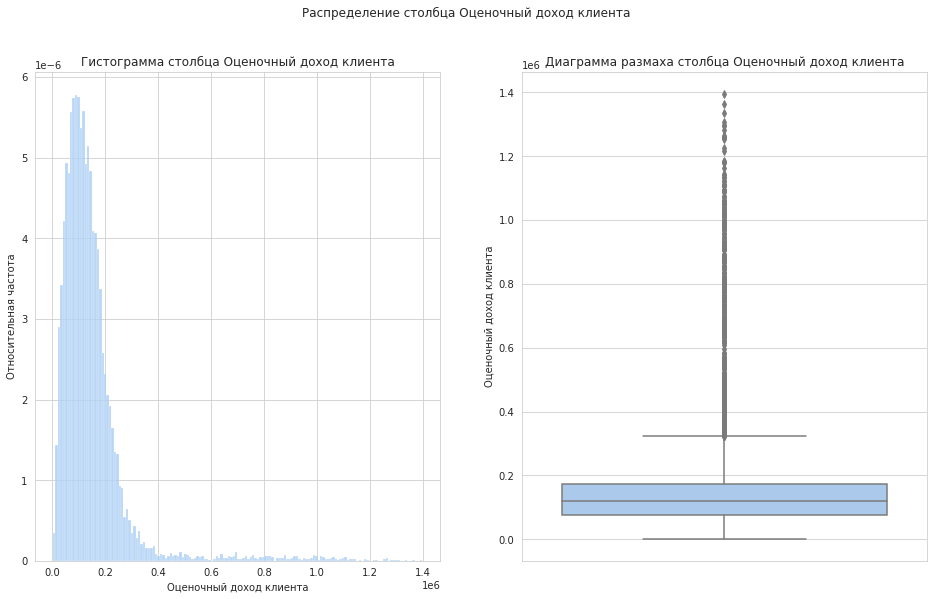

count    9.974000e+03
mean     1.477868e+05
std      1.392855e+05
min      2.546300e+03
25%      7.525166e+04
50%      1.196268e+05
75%      1.744998e+05
max      1.395064e+06
Name: est_salary, dtype: float64


In [54]:
num_distr(df, 'est_salary', 'Оценочный доход клиента')

In [55]:
#граница верхнего уса

q1, q3 = df['est_salary'].quantile([0.25, 0.75])
iqr = q3 - q1

q3 +1.5 * iqr

323372.04125

In [56]:
#доля выбросов
len(df.query('est_salary > 323372')) / len(df) * 100

4.802486464808502

In [57]:
len(df.query('(balance > 2006579) & (est_salary > 323372)'))/ len(df) * 100

1.1830759975937437

Значения столбца est_salary распределены в отрезке от 2 546.3 до  1 395 064. Медиана и среднее различаются. 50% всех значений попадают в промежуток от 75 251.6 до 174 499.8. Выбросы попадают в промежуток от 323 3732 до 1 395 064. и составляют менее 5% от всего количества данных. Вместе с выбросами от баланса на счете таких клиентов насчитывается 1.18%. Опять же считаю ненужным удалять эти значения, так как количество миллионеров в таком соотношении к остальным клиентам банкам вполне реалистично.

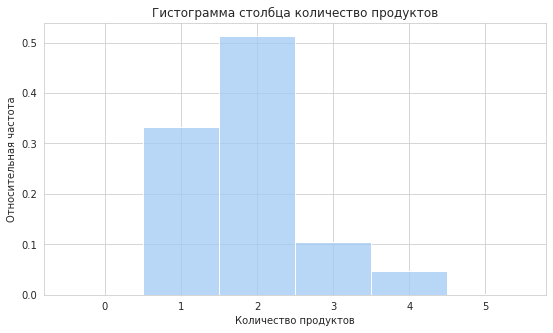

count    9974.000000
mean        1.871466
std         0.792729
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         5.000000
Name: products, dtype: float64


In [58]:
plt.figure(figsize=(9, 5))
ax = sns.histplot(df['products'], common_norm=False, stat='density', discrete=True)
ax.set(xlabel='Количество продуктов', ylabel="Относительная частота", title='Гистограмма столбца количество продуктов')
     
    
plt.show()
print(df['products'].describe())

Значения столбца products изменяются в отрезке от 0 до 5. Медиана и среднее немного различаются. 50% всех клиентов имеют 1 или 2 продукта банка. По 25% клиентов имеют 0 или 1 продукт, и от 2 до 5 продуктов. 

Все значения укладываются в реалистичную шкалу диапазона количества продуктов.

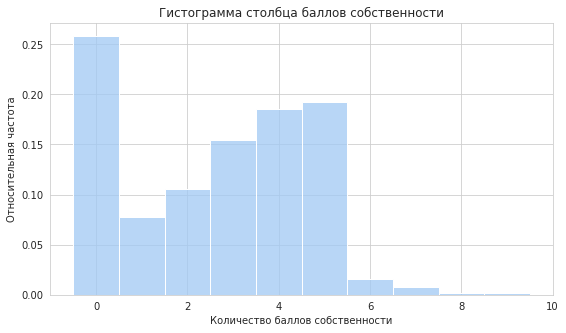

count    9974.000000
mean        2.630840
std         1.979965
min         0.000000
25%         0.000000
50%         3.000000
75%         4.000000
max         9.000000
Name: equity, dtype: float64


In [59]:
#баллы собственности
plt.figure(figsize=(9, 5))
ax = sns.histplot(df['equity'], common_norm=False, stat='density', discrete=True)
ax.set(xlabel='Количество баллов собственности', ylabel="Относительная частота", 
       title='Гистограмма столбца баллов собственности')
     
    
plt.show()
print(df['equity'].describe())

Значения столбца equity изменяются в отрезке от 0 до 9. Медиана и среднее немного различаются. 50% всех клиентов имеют от 0 до 4 баллов собственности. Все значения укладываются в реалистичную шкалу диапазона количества баллов собственности.

In [60]:
#меняем типы данных
df['age'] = df['age'].astype('int')
df['score'] = df['score'].astype('int')

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9974 entries, 0 to 9973
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        9974 non-null   int64  
 1   score          9974 non-null   int64  
 2   city           9974 non-null   object 
 3   gender         9974 non-null   object 
 4   age            9974 non-null   int64  
 5   equity         9974 non-null   int64  
 6   balance        7695 non-null   float64
 7   products       9974 non-null   int64  
 8   credit_card    9974 non-null   int64  
 9   last_activity  9974 non-null   int64  
 10  est_salary     9974 non-null   float64
 11  churn          9974 non-null   int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 935.2+ KB


На этапе предобработки данных было сделано:
1. Названия столбцов приведены к змеиному регистру
2. Обработаны дубликаты с предварительным их исследованием
3. Обработаны пропуски с предварительным их исследованием
4. Изучено распределение переменнных
5. Изменены типы переменных

### Исследовательский анализ данных

#### сколько всего пользователей

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9974 entries, 0 to 9973
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        9974 non-null   int64  
 1   score          9974 non-null   int64  
 2   city           9974 non-null   object 
 3   gender         9974 non-null   object 
 4   age            9974 non-null   int64  
 5   equity         9974 non-null   int64  
 6   balance        7695 non-null   float64
 7   products       9974 non-null   int64  
 8   credit_card    9974 non-null   int64  
 9   last_activity  9974 non-null   int64  
 10  est_salary     9974 non-null   float64
 11  churn          9974 non-null   int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 935.2+ KB


К этому этапу в наборе данных осталось 9974 уникальных пользователя из трех городов. Имеются пропуски только в одном столбце - balance.

#### Определение портрета типичного клиента банка с помощью мер центральной тенденции

Опишем типичного клиента банка с помощью мер центральной тенденции: для категориальных переменных будет использована мода, для числовых непрерывных без выбросов - среднее значение, для числовых с выбросами и дискретных - медиана. 

In [63]:
df.describe()

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,9974.000000,9974.000000,9974.000000,9974.000000,7.695000e+03,9974.000000,9974.000000,9974.000000,9.974000e+03,9974.000000
mean,171755.218669,848.682575,42.734409,2.630840,8.272456e+05,1.871466,0.680168,0.522859,1.477868e+05,0.182374
std,33695.527126,65.399720,12.179971,1.979965,1.980327e+06,0.792729,0.466435,0.499502,1.392855e+05,0.386172
min,94561.000000,642.000000,18.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,2.546300e+03,0.000000
25%,142760.000000,802.000000,33.000000,0.000000,2.956987e+05,1.000000,0.000000,0.000000,7.525166e+04,0.000000
50%,172643.000000,853.000000,40.000000,3.000000,5.242953e+05,2.000000,1.000000,1.000000,1.196268e+05,0.000000
75%,201163.750000,900.000000,51.000000,4.000000,9.800512e+05,2.000000,1.000000,1.000000,1.744998e+05,0.000000
max,229145.000000,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.000000,1.000000,1.395064e+06,1.000000


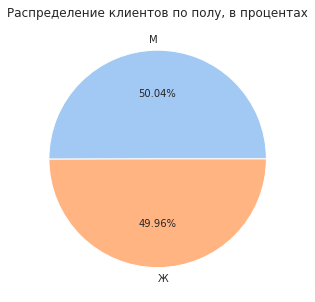

In [64]:
plt.figure(figsize=(9, 5))
plt.pie(df['gender'].value_counts(), labels = df['gender'].value_counts().index, autopct='%.2f%%')
plt.title('Распределение клиентов по полу, в процентах')
plt.show()

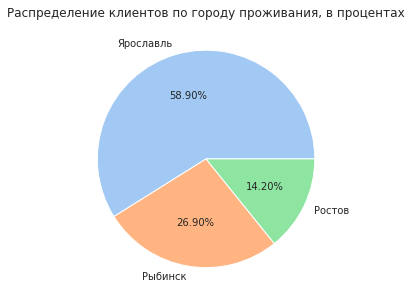

In [65]:
plt.figure(figsize=(9, 5))
plt.pie(df['city'].value_counts(),  labels = df['city'].value_counts().index, autopct='%.2f%%')
plt.title('Распределение клиентов по городу проживания, в процентах')
plt.show()

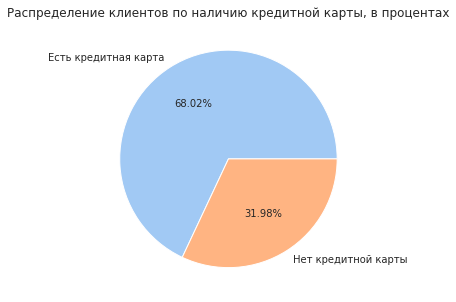

In [66]:
plt.figure(figsize=(9, 5))
plt.pie(df['credit_card'].value_counts(),  labels = ['Есть кредитная карта', 'Нет кредитной карты'], autopct='%.2f%%')
plt.title('Распределение клиентов по наличию кредитной карты, в процентах')
plt.show()

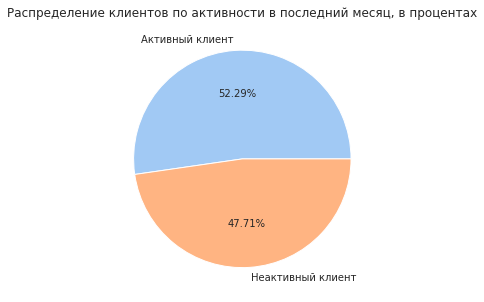

In [67]:
plt.figure(figsize=(9, 5))
plt.pie(df['last_activity'].value_counts(),  labels = ['Активный клиент', 'Неактивный клиент'], autopct='%.2f%%')
plt.title('Распределение клиентов по активности в последний месяц, в процентах')
plt.show()

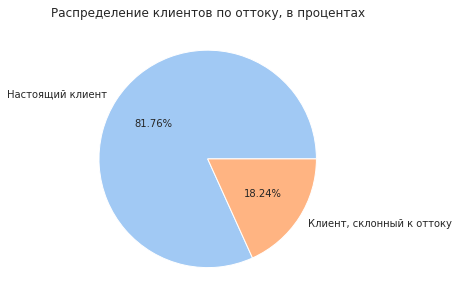

In [68]:
plt.figure(figsize=(9, 5))
plt.pie(df['churn'].value_counts(),  labels = ['Настоящий клиент', 'Клиент, склонный к оттоку'], autopct='%.2f%%')
plt.title('Распределение клиентов по оттоку, в процентах')
plt.show()

Типичный клиент банка это:
* мужчина 
* из Ярославля
* в возрасте 40 лет, 
* с 853 баллами кредитного скоринга,
* с 3 баллами собственности
* с балансом на счете 524 295.3
* владеющий двумя продуктами банка
* с кредитной картой
* активный в последний месяц
* с оценочной собственностью в 119 626.8
* который не склонен уйти из банка

#### Группы клиентов по количеству потребляемых продуктов

In [69]:
group_0 = df.loc[df['products'] == 0]
group_1 = df.loc[df['products'] == 1]
group_2 = df.loc[df['products'] == 2]
group_3 = df.loc[df['products'] == 3]
group_4 = df.loc[df['products'] == 4]
group_5 = df.loc[df['products'] == 5]

In [70]:
len(group_0) + len(group_1) + len(group_2) + len(group_3) + len(group_4) + len(group_5) == len(df)

True

In [71]:
len_groups = pd.DataFrame({'group': ['group_0', 'group_1', 'group_2', 'group_3', 'group_4', 'group_5'], 
                           'size': [len(group_0), len(group_1), len(group_2), len(group_3), len(group_4),len(group_5)]})\
                            .sort_values(by='size', ascending=False)

len_groups

,group,size
2,group_2,5119
1,group_1,3323
3,group_3,1038
4,group_4,474
5,group_5,19
0,group_0,1


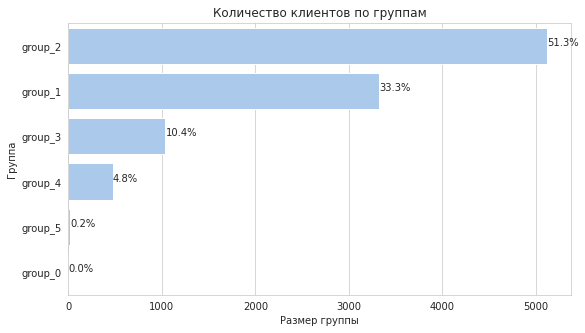

In [173]:
plt.figure(figsize=(9, 5))
ax = sns.barplot(data = len_groups, x='size', y = 'group', color='#a1c9f4')
ax.set(ylabel='Группа', xlabel = 'Размер группы', title='Количество клиентов по группам')
total = len(df) 

#подписываем проценты встречаемости клиентов по группам относительно общего количества клиентов банка.
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width() / total)
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height() / 2
    ax.annotate(percentage, (x, y))
plt.show()

Клиенты разбиты на 6 групп по количеству имеющихся у них продуктов банка. Самая многочисленная группа - с двумя продуктами, 5119 человек, в группе с 1 продуктом 3323 человек, 3 - 1038, 4 - 474, 5 - 19, 0 - 1. В связи с этим, нулевая группа рассматриваться подробно не будет.

#### Отличительные черты получившихся групп

In [74]:
#функция, который будет строить диаграммы сравнения показателей по группам
def group_features(df, x, y, ylabel, num=True):
    
    if num == True:
        plt.figure(figsize=(15, 9))
        sns.boxplot(data=df, x=x, y=y)
        plt.ylabel(ylabel)
        plt.title('Диаграмма размаха показателя '+ ylabel+ ' по группам');
        plt.xlabel('Группы клиентов по количеству продуктов')
    else:
        fig, ax = plt.subplots(1, 2, figsize=(16, 9))
        fig.suptitle('Количество клиентов по  показателю '+ ylabel+ ' по группам')

        ax1 = sns.countplot(data=df, hue=y, x=x, ax=ax[0])
        ax1.set(xlabel='Группы клиентов по количеству продуктов', ylabel='Количество клиентов', 
                title='Абсолютные показатели от всего количества клиентов банка')
        df1 = df.groupby(x)[y].value_counts(normalize=True)
        df1 = df1.mul(100)
        df1 = df1.rename('percent').reset_index()
        
        ax2 = sns.barplot(x=x, y='percent', hue=y,data=df1, ax=ax[1])
        ax2.set(xlabel='Группы клиентов по количеству продуктов', ylabel='Процент', 
                title='Относительные показатели внутри группы')
        for bar in ax2.patches:
            x_pos = bar.get_x() + bar.get_width() / 2
            y_pos = bar.get_height()
            ax2.text(x_pos, y_pos, f'{y_pos:.1f}%', ha='center', va='bottom', fontsize=9)

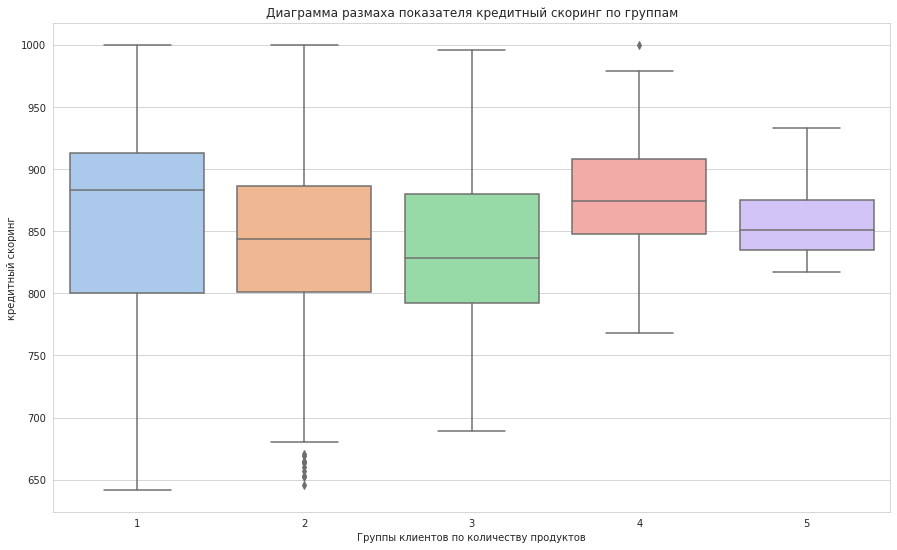

In [75]:
 group_features(df.loc[df['products'] != 0],'products', 'score', 'кредитный скоринг')

Максимальный разброс значений кредитного скоринга как в целом по выборке, так и по 50% клиентов у клиентов группы 1, у них же наблюдается и самый высокий медианный показатель скоринга. Самый низкий медианный показатель кредитного скоринга у клиентов группы 3. Стоит обратить внимание на клиентов группы 2, несмотря на присутствие выбросов, в этой группе наблюдается довольно симметричное распределение.

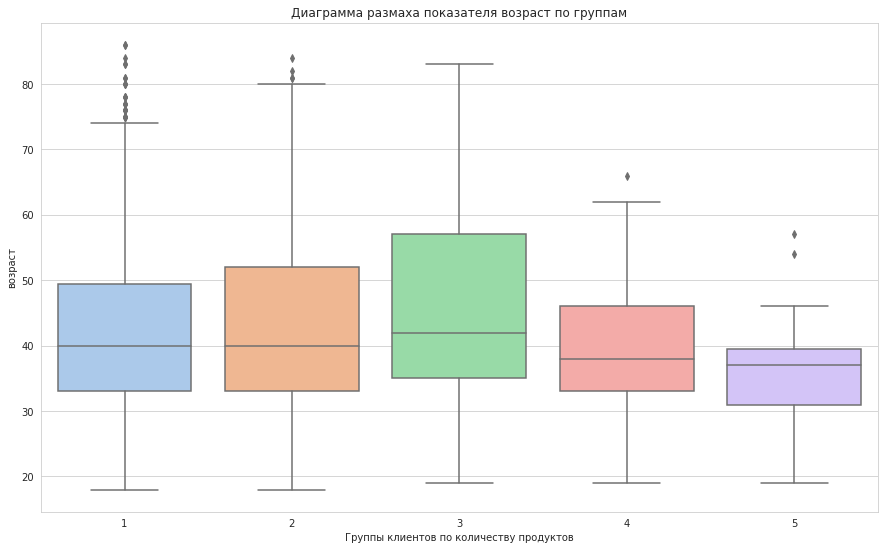

In [76]:
 group_features(df.loc[df['products'] != 0],'products', 'age', 'возраст')

В группе 1 наибольшее число клиентов старшего возраста, при этом 50% всех клиентов этой группы в возрасте от 33 до 50 лет. Максимальный разброс для 50% клиентов у 3 группы: от 36 до 55 лет, в этой группе также самый высокий минимальный возраст - 20 лет. 

 group_features(df,'products', 'balance', 'баланс на счёте')

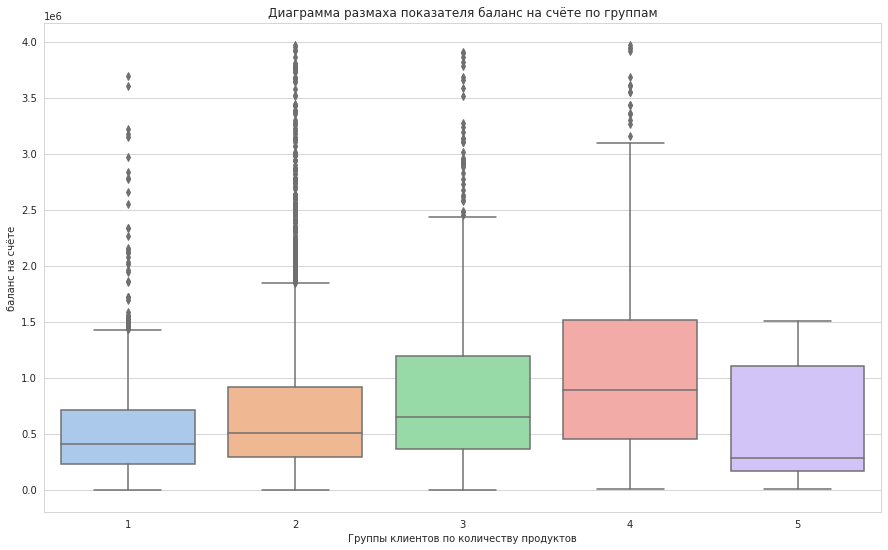

In [77]:
group_features(df.loc[df['products'] != 0].query('balance < 4000000'),'products', 'balance', 'баланс на счёте')

Самый высокий медианный баланс на счете у клиентов 4 группы, самый низкий - у 5. Практически в каждой группе есть выбивающиеся значения.

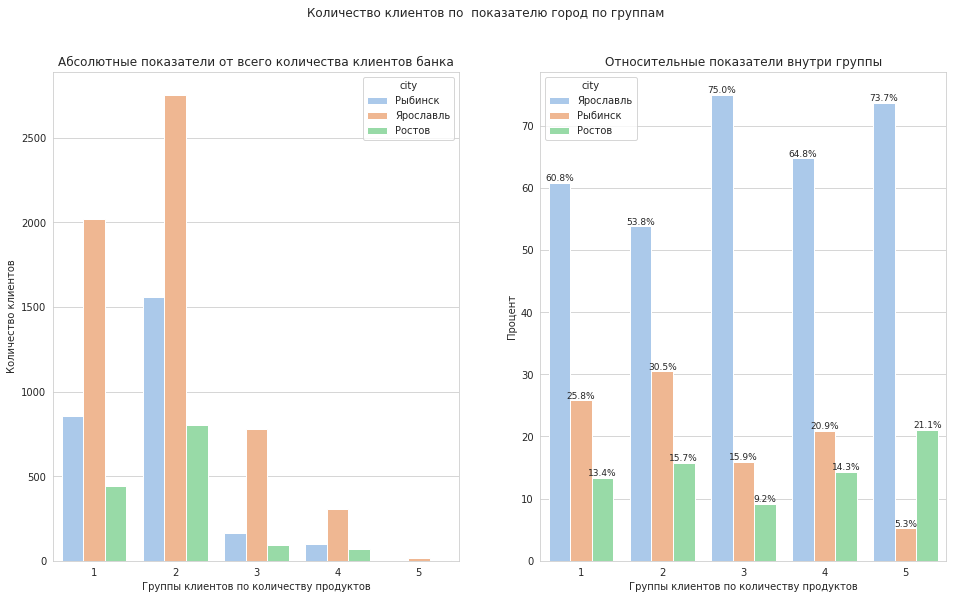

In [78]:
group_features(df.loc[df['products'] != 0],'products', 'city', 'город', num=False) 

Во всех группах большинство клиентов из Ярославля, на втором месте из Рыбинска, на последнем - из Ростова.

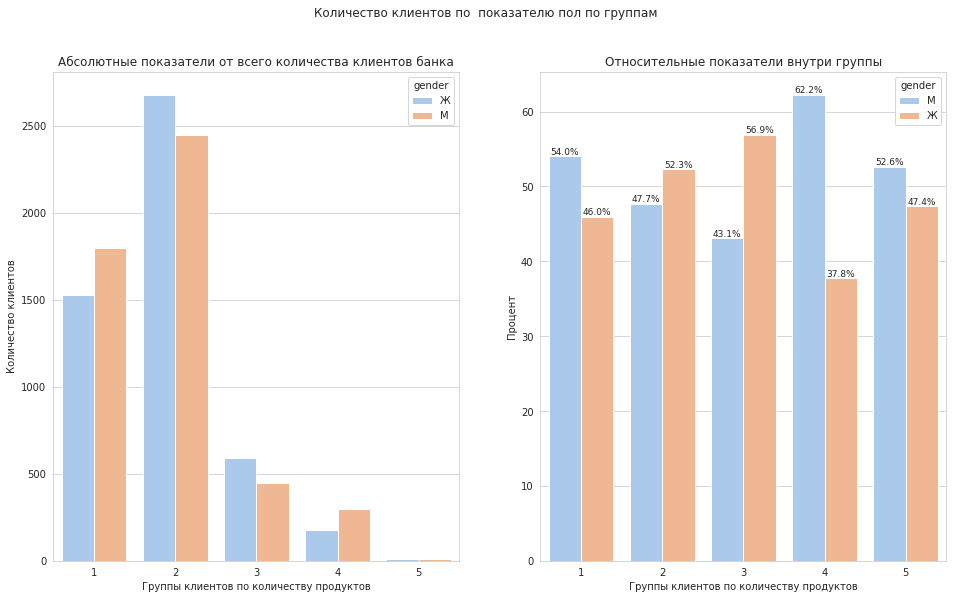

In [79]:
group_features(df.loc[df['products'] != 0],'products', 'gender', 'пол', num=False) 

В 1, 4 и 5 группах большинство клиентов мужского пола, во 2 и 3 - женского пола.

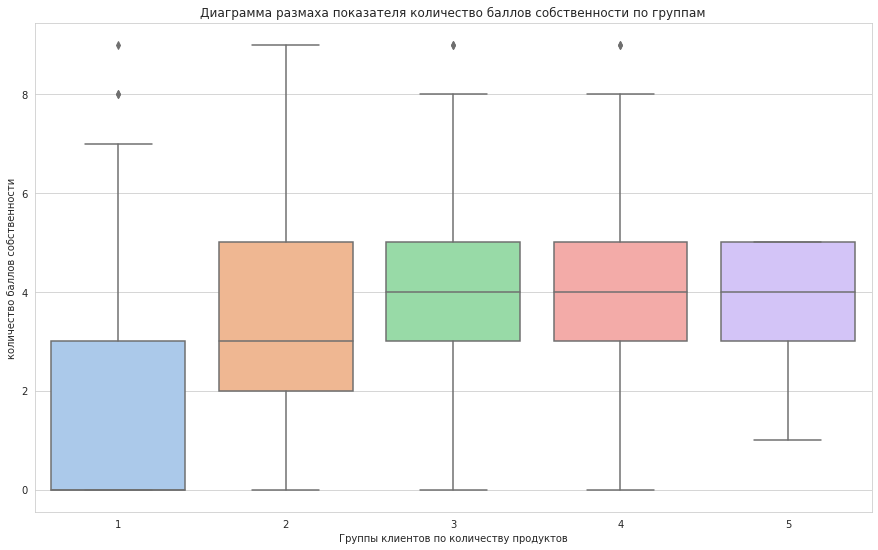

In [80]:
group_features(df.loc[df['products'] != 0],'products', 'equity', 'количество баллов собственности') 

In [81]:
df_pivot = df.loc[df['products'] != 0].pivot_table(index='products', columns= 'equity', values='user_id', aggfunc='count')
df_pivot['total_gr'] = df_pivot.sum(axis= 1 )
for i in df_pivot.columns:
    df_pivot[i] = round(df_pivot[i] / df_pivot['total_gr'] * 100, 2)
    
df_pivot = df_pivot.fillna(0)

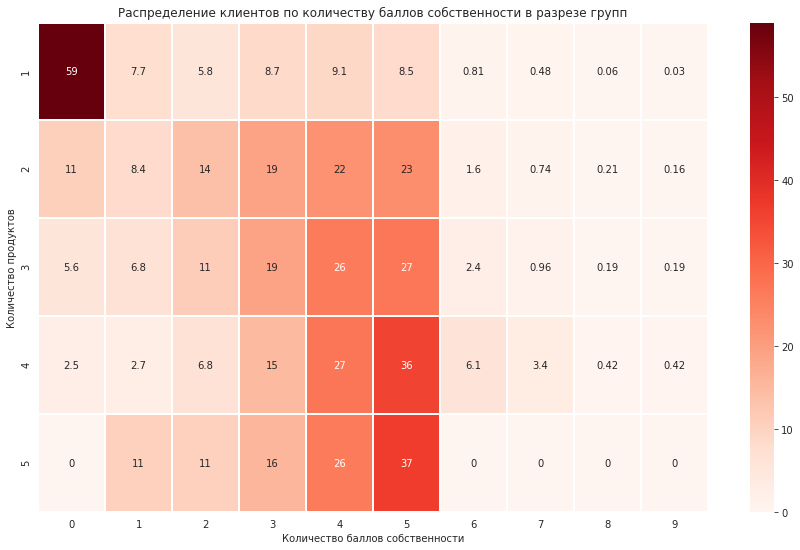

In [82]:
#графическое отображение количества клиентов по баллам собственности в разрезе групп
plt.figure(figsize=(15, 9))
sns.heatmap(data=df_pivot.drop('total_gr', axis=1), annot = True, linewidth=1, cmap='Reds')
plt.title('Распределение клиентов по количеству баллов собственности в разрезе групп')
plt.xlabel('Количество баллов собственности')
plt.ylabel('Количество продуктов')
plt.show()

В 1 группе значительно преобладают клиенты с 0 баллами собственности, в остальных группах больше клиентов с 5 баллами собственности. 


posx and posy should be finite values
posx and posy should be finite values


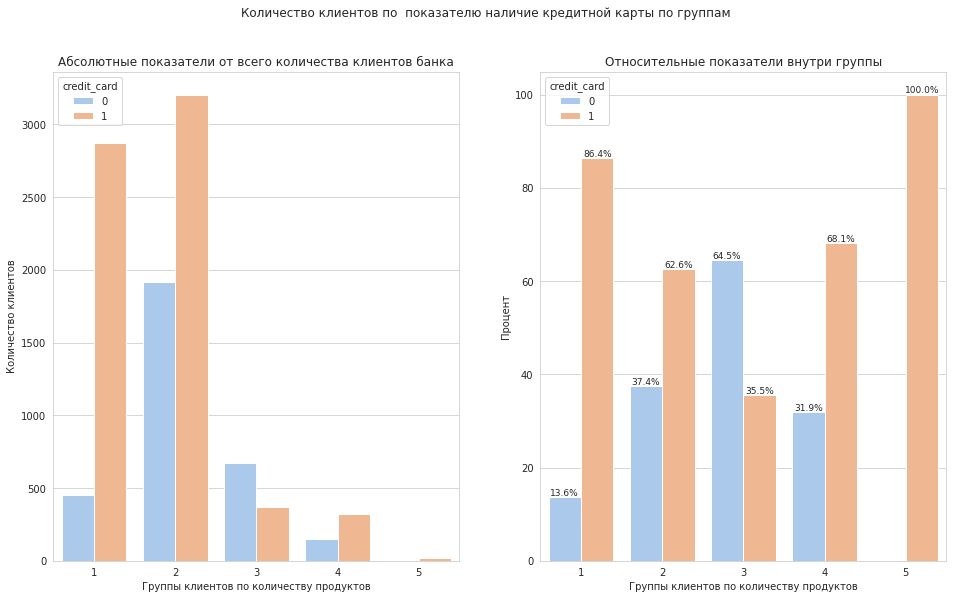

In [85]:
group_features(df.loc[df['products'] != 0],'products', 'credit_card', 'наличие кредитной карты', num=False) 

In [86]:
dat = df.loc[df['products'] != 0].groupby('products')['credit_card'].mean()
dat

products
1    0.863677
2    0.625708
3    0.355491
4    0.681435
5    1.000000
Name: credit_card, dtype: float64

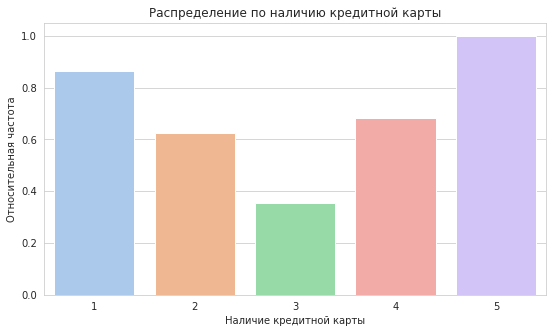

In [87]:
plt.figure(figsize=(9, 5))
ax = sns.barplot(y=dat, x=dat.index)
ax.set(xlabel='Наличие кредитной карты', ylabel="Относительная частота", title='Распределение по наличию кредитной карты' );   

Только в 3ей группе у большинства клиентов нет кредитной карты. Следует отметить, что в группе с одним продуктом у большинства есть кредитная карта, то есть эта группа является заещиками этого банка.

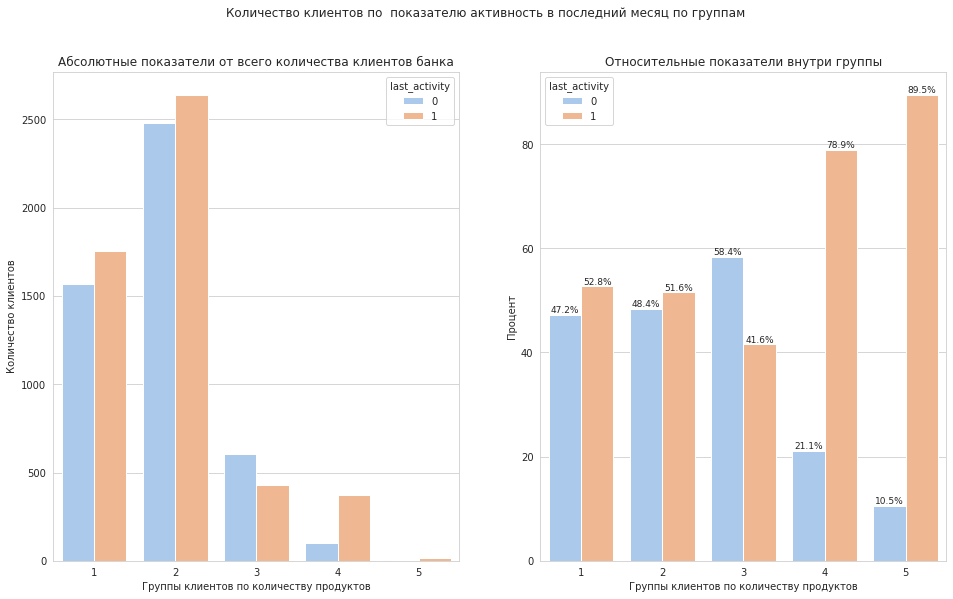

In [90]:
group_features(df.loc[df['products'] != 0],'products', 'last_activity', 'активность в последний месяц', num=False) 

In [91]:
dat = df.loc[df['products'] != 0].groupby('products')['last_activity'].mean()
dat

products
1    0.527535
2    0.515530
3    0.416185
4    0.789030
5    0.894737
Name: last_activity, dtype: float64

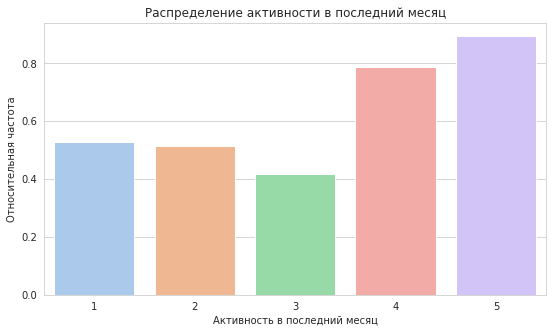

In [92]:
plt.figure(figsize=(9, 5))
ax = sns.barplot(y=dat, x=dat.index)
ax.set(xlabel='Активность в последний месяц', ylabel="Относительная частота",
       title='Распределение активности в последний месяц' );   

Только в 3 группе большинство клиентов не было активным в последний месяц. В 4 и 5 группах активным было подавляющее большинство.

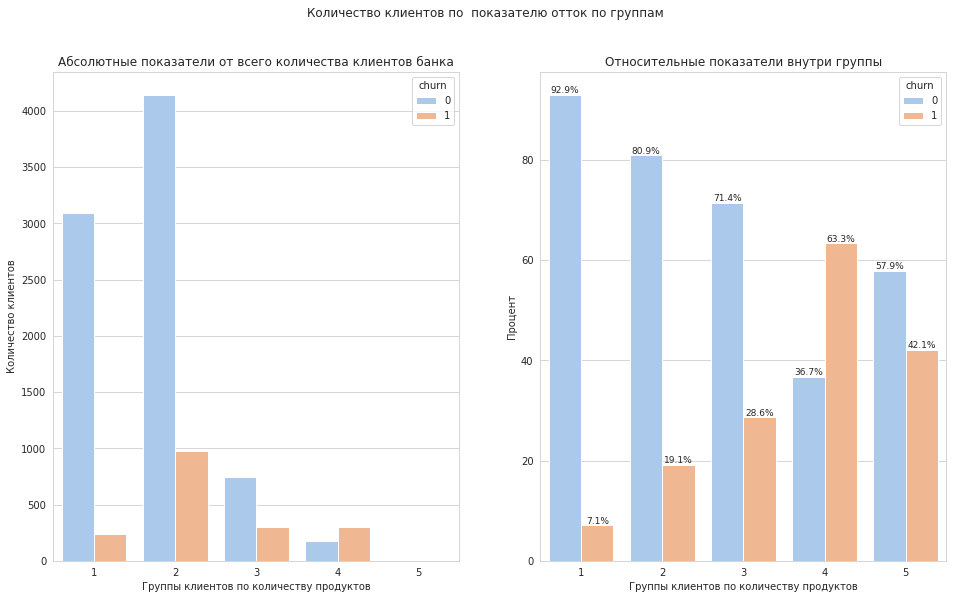

In [93]:
group_features(df.loc[df['products'] != 0],'products', 'churn', 'отток', num=False) 

In [94]:
dat = df.loc[df['products'] != 0].groupby('products')['churn'].mean()
dat

products
1    0.070719
2    0.191053
3    0.286127
4    0.632911
5    0.421053
Name: churn, dtype: float64

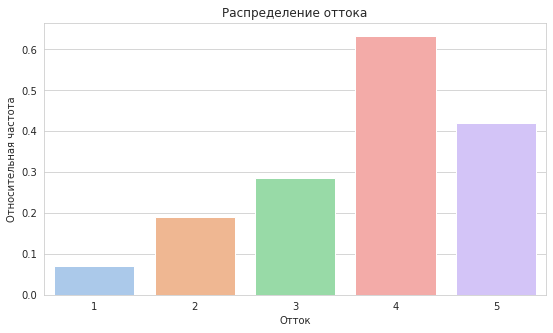

In [95]:
plt.figure(figsize=(9, 5))
ax = sns.barplot(y=dat, x=dat.index)
ax.set(xlabel='Отток', ylabel="Относительная частота", title='Распределение оттока' );   

В 4 группе большинство клиентов ушло из банка, в 5 группе неушедших из банка больше, чем ушедших, но соотношение не такое большое, эта группа находится в зоне риска, в 1-3 группе количество клиентов, оставшихся с банком, значительно превышает количество клиентов, попавших в отток (особенности в 1 и 2).

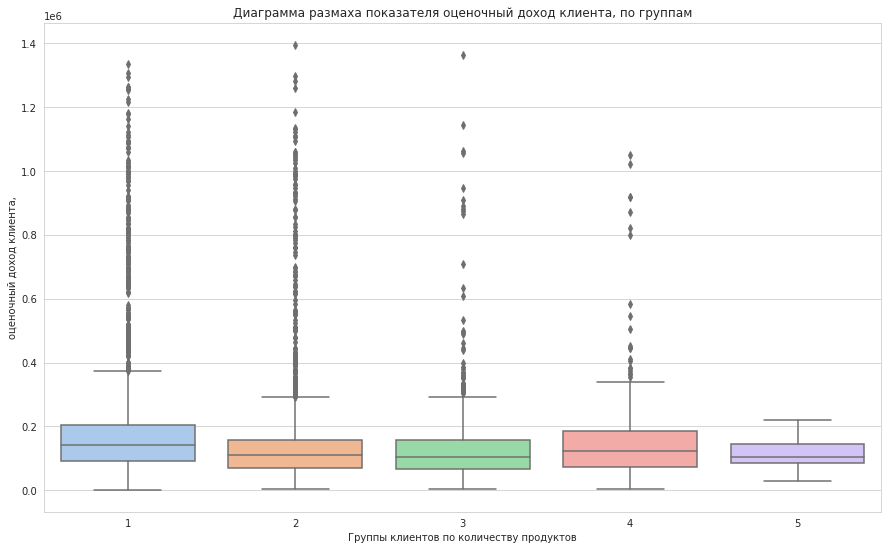

In [96]:
group_features(df.loc[df['products'] != 0],'products', 'est_salary', 'оценочный доход клиента,') 

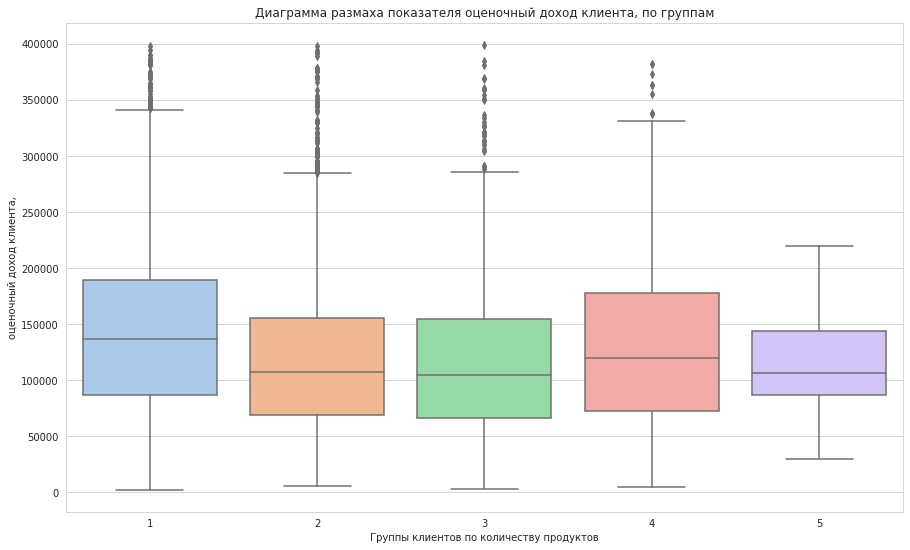

In [97]:
group_features(df.loc[df['products'] != 0].query('est_salary < 400000'),'products', 'est_salary', 'оценочный доход клиента,')

Самый высокий медианный доход у клиентов 1 группы - около 140000, самый низкий в 3 группе, чуть больше 100000.

#### Сравнение портретов типичного пользователя в получившихся группах

Вычислим отдельно медианные значения числовых столбцов, чтобы знать точные их значения.

In [98]:
df.groupby('products')['score'].median()

products
0    962
1    883
2    844
3    828
4    874
5    851
Name: score, dtype: int64

In [99]:
round(df.groupby('products')['est_salary'].median())

products
0     25064.0
1    142163.0
2    109508.0
3    105656.0
4    122473.0
5    106034.0
Name: est_salary, dtype: float64

In [100]:
round(df.groupby('products')['balance'].median())

products
0         NaN
1    415369.0
2    515461.0
3    665382.0
4    939343.0
5    282262.0
Name: balance, dtype: float64

In [101]:
round(df.groupby('products')['age'].median())

products
0    79
1    40
2    40
3    42
4    38
5    37
Name: age, dtype: int64

Представим самые типичные показатели по признакам внутри групп в виде таблицы:

| признак | 1 группа | 2 группа | 3 группа | 4 группа | 5 группа |
|---| --- | --- | --- | --- | --- |
|наиболее часто встречающийся пол | мужской | женский | женский | **мужской** | мужской |
| медианный возраст | 40 | 40 | 42 | 38 | 37 |
| наиболее часто встречающийся город | Ярославль | Ярославль | Ярославль | Ярославль | Ярославль |
| медианный балл кредитного скоринга | **883** | 844 | 828 | 874 | 851 |
| медианный баланс на счёте | 415369 | 515461.0 | 665382.0 | **939343.0** | 282262.0 |
| наличие кредитной карты в большинстве случаев | есть | есть | **нет** | есть | есть |
| активность в последний месяц в большинстве случаев | есть | есть | **нет** | есть | есть |
| медианный оценочный доход клиента | **142163.0** | 109508.0 | 105656.0 | 122473.0 | 106034.0 |
| отток в большинстве случаев | нет | нет | нет | **есть** | нет |




#### Отток клиентов в разрезе значений или диапазонов значений

In [102]:
#функция, изображающая оценку графика плотности в целом
def kde_churn(df, column, label, num=True):
    plt.figure(figsize=(15, 9))
    if num==True:
        
        sns.kdeplot(data=df, x=column, hue="churn",
                fill=True, common_norm=False,
                alpha=0.5, linewidth=0, palette="pastel")
    else:
        sns.histplot(data=df, x=column, hue="churn", common_norm=False, stat='density', multiple="dodge", shrink=0.8);
    plt.ylabel('Плотность')
    plt.title('Отток клиентов в разрезе показателя ' + label);
    plt.legend(title='Отток клиентов', loc='best', labels=['Отток', 'Не отток']);
    plt.xlabel(label);

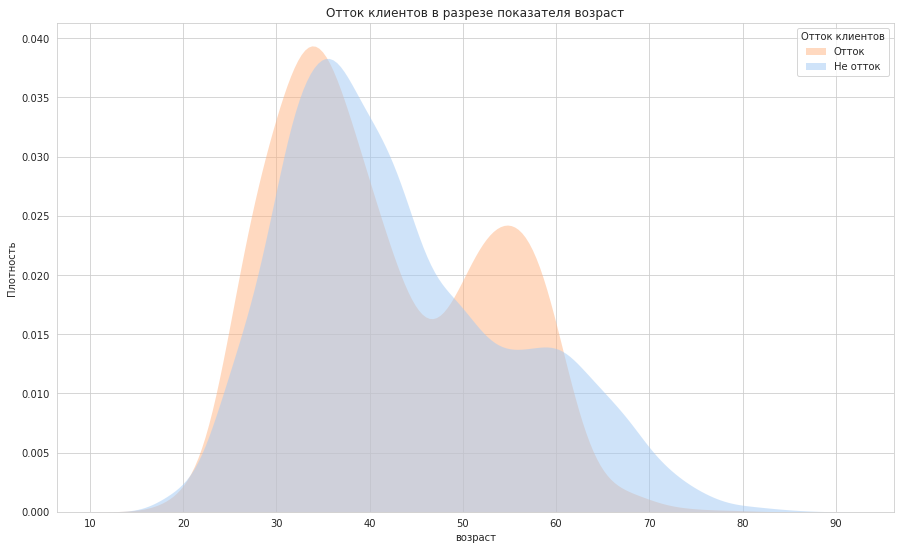

In [103]:
kde_churn(df, 'age', 'возраст')

В 2х возрастных группах вероятность попасть в отток преобладает: от 23 до 35 и от 48 до 61. Причем максимальная разница наблюдается в возрасте 55 лет. В возрасте от 35 до 48 лет и после 61 года вероятность попасть в отток ниже.

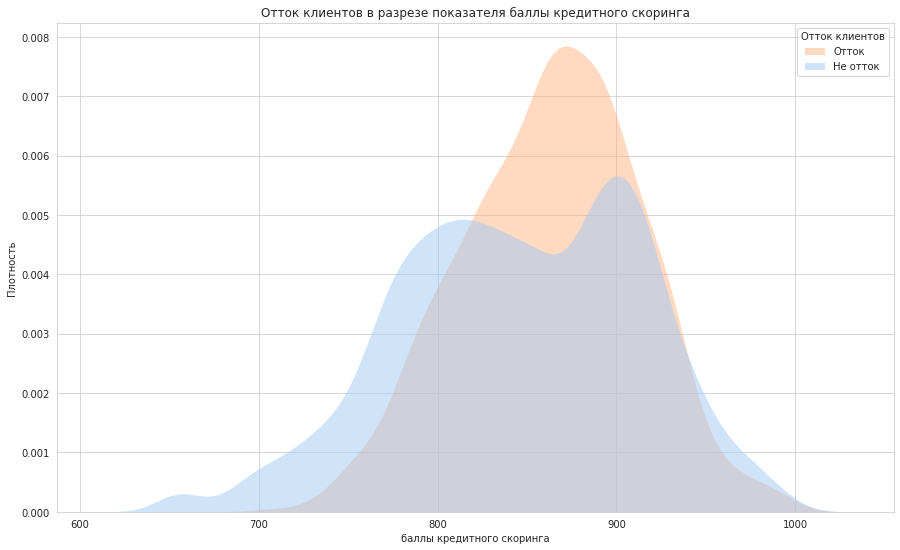

In [104]:
kde_churn(df, 'score', 'баллы кредитного скоринга')

Вероятность клиентов с баллами кредитного скоринга от 820 до 910 выше попасть в отток. В свою очередь клиенты с баллами от 650 до 820 и от 950 до 990 вероятнее останутся клиентами банка.

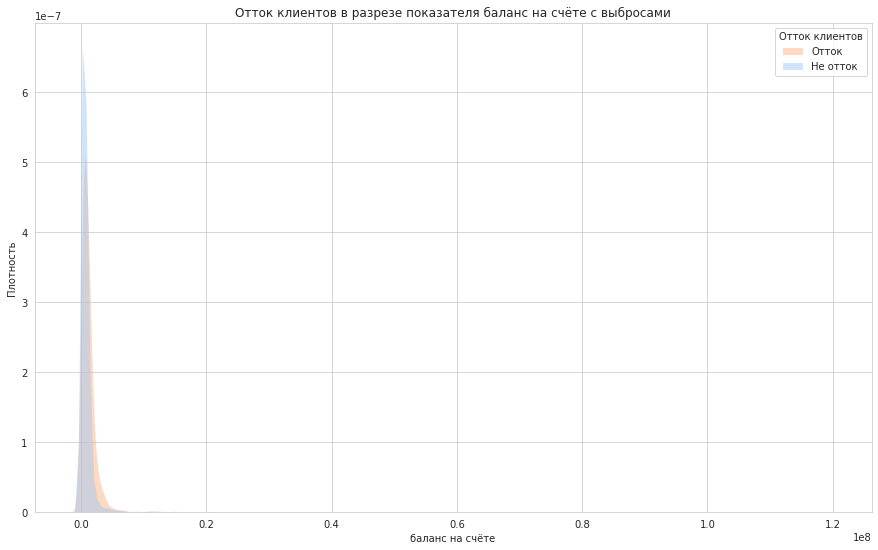

In [105]:
kde_churn(df, 'balance', 'баланс на счёте')
plt.title('Отток клиентов в разрезе показателя баланс на счёте с выбросами');

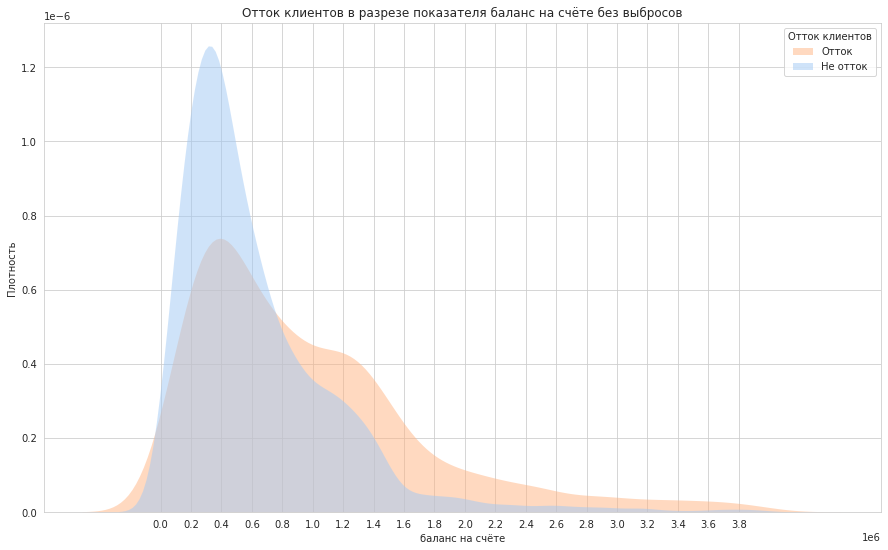

In [106]:
kde_churn(df.query('balance < 4000000'), 'balance', 'баланс на счёте')
plt.xticks(np.arange(0, 4000000, 200000))
plt.title('Отток клиентов в разрезе показателя баланс на счёте без выбросов');

Клиенты с балансом на счёте до 800000 значительно реже попадают в отток, клиенты с балансом выше 800000 чаще попадают в отток.

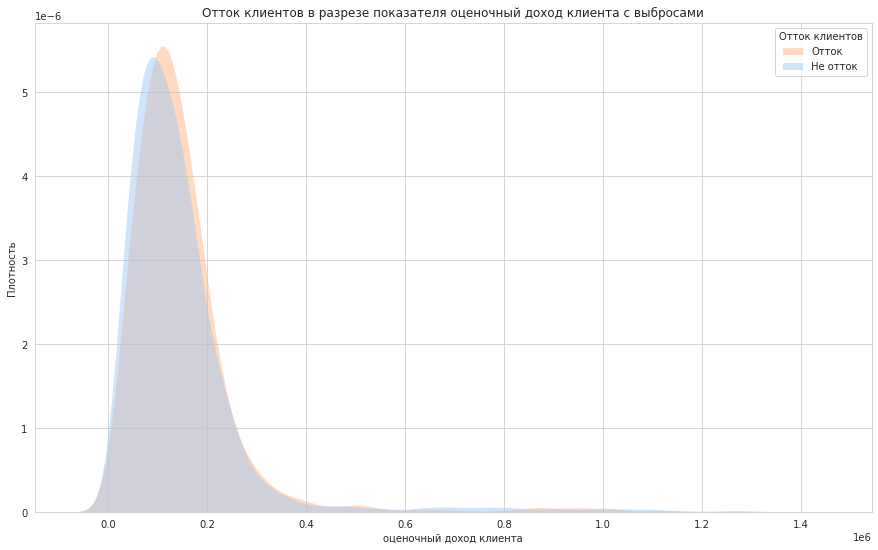

In [107]:
kde_churn(df, 'est_salary', 'оценочный доход клиента')
plt.title('Отток клиентов в разрезе показателя оценочный доход клиента с выбросами');

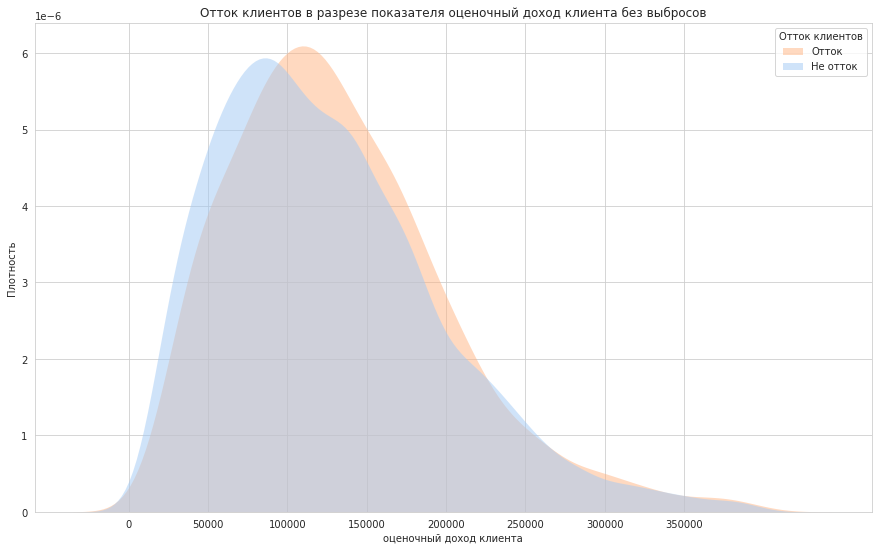

In [108]:
kde_churn(df.query('est_salary < 400000'), 'est_salary', 'оценочный доход клиента')
plt.xticks(np.arange(0, 400000, 50000))
plt.title('Отток клиентов в разрезе показателя оценочный доход клиента без выбросов');

Клиенты с оценочным доходом от 20000 до  до 80000 реже попадают в отток, клиенты с ценочным доходом выше ~~220000~~ 90 000 чаще попадают в отток.

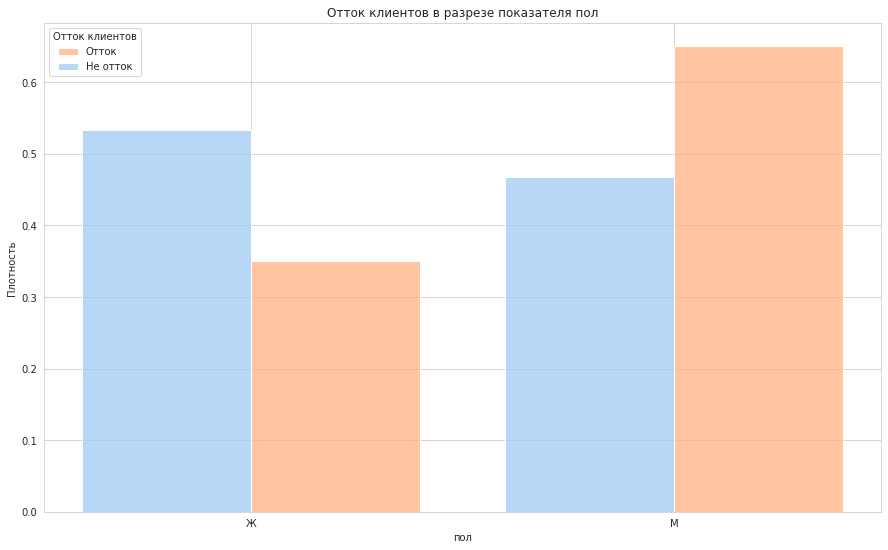

In [109]:
kde_churn(df, 'gender', 'пол', num=False)

Мужчины чаще всего попадают в отток, женщины в свою очередь предпочитают оставаться клиентом банка.

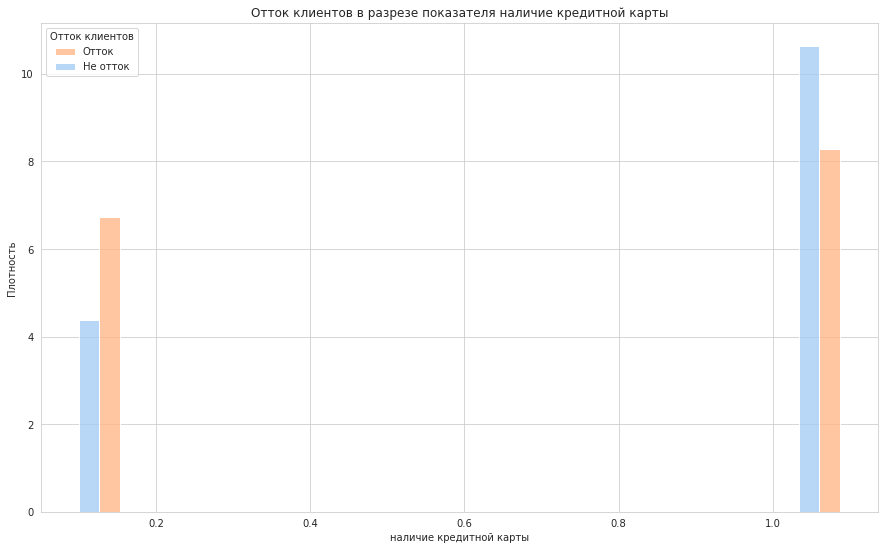

In [110]:
kde_churn(df, 'credit_card', 'наличие кредитной карты', num=False)

In [174]:
df.groupby('credit_card')['churn'].mean().sort_values(ascending=False)

credit_card
0    0.255799
1    0.147848
Name: churn, dtype: float64

Клиенты с кредитной картой как чаще попадают в отток, так и остаются клиентами банка.

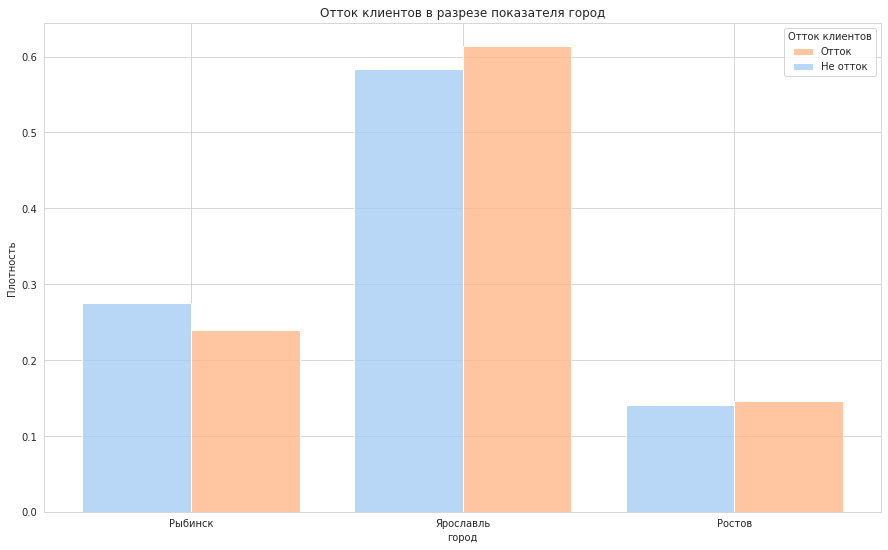

In [111]:
kde_churn(df, 'city', 'город', num=False)

Чаще других в отток, а также остаются клиентами банка жители Ярославля.

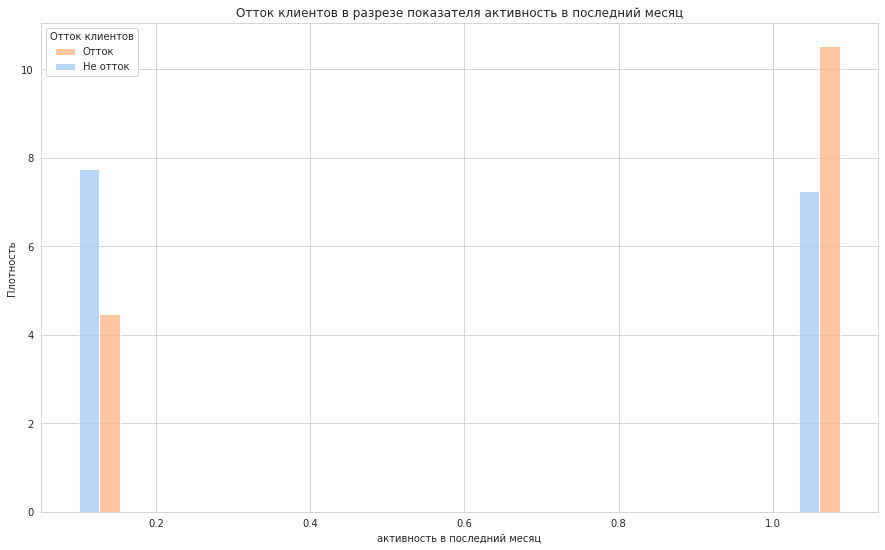

In [112]:
kde_churn(df, 'last_activity', 'активность в последний месяц', num=False)

Клиенты с активностью в последний месяц чаще попадают в отток, неактивные клиенты чаще остаются в банке.

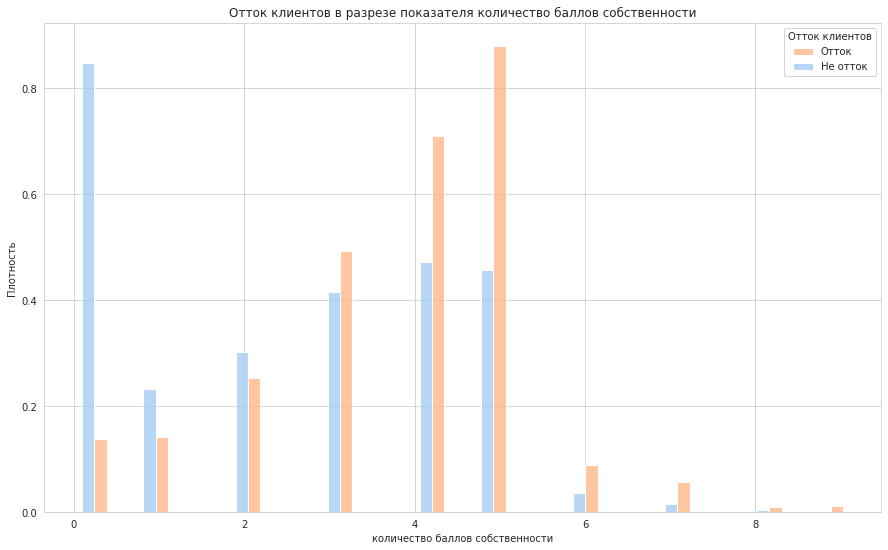

In [113]:
kde_churn(df, 'equity', 'количество баллов собственности', num=False)

In [114]:
df.groupby('equity')['churn'].mean().sort_values(ascending=False)

equity
9    0.538462
7    0.462500
6    0.360248
8    0.352941
5    0.300783
4    0.251218
3    0.208955
2    0.157945
1    0.120310
0    0.034938
Name: churn, dtype: float64

Клиенты с баллами собственности от 0 чаще других не попадают в отток. Самая высокая вероятность попасть у клиентов с 9 баллами собственности.  

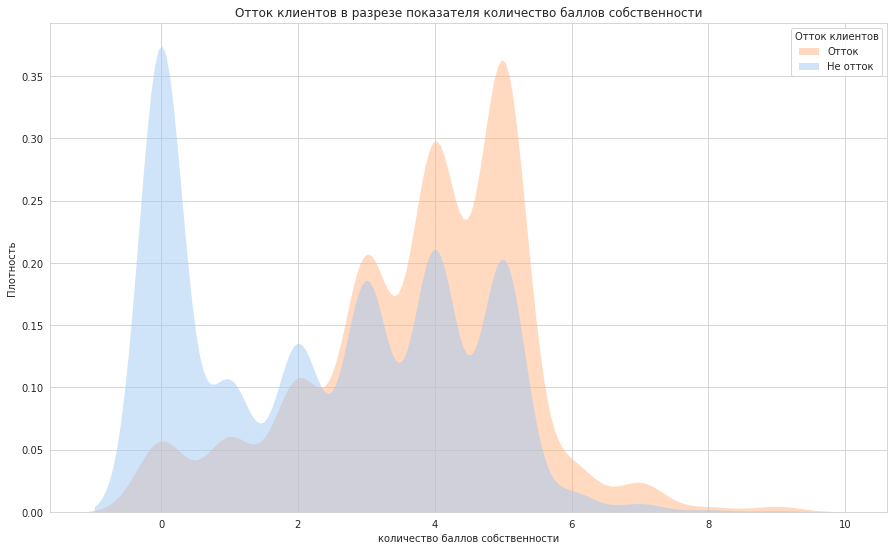

In [115]:
kde_churn(df, 'equity', 'количество баллов собственности')

In [171]:
dat = df.loc[df['products']!=0].groupby('products')['churn'].mean().sort_values(ascending=False)
dat

products
4    0.632911
5    0.421053
3    0.286127
2    0.191053
1    0.070719
Name: churn, dtype: float64

In [167]:
print(sns.color_palette("pastel").as_hex())

['#a1c9f4', '#ffb482', '#8de5a1', '#ff9f9b', '#d0bbff', '#debb9b', '#fab0e4', '#cfcfcf', '#fffea3', '#b9f2f0']


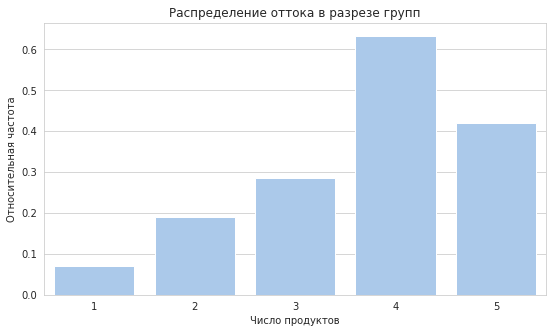

In [172]:
plt.figure(figsize=(9, 5))
ax = sns.barplot(y=dat, x=dat.index, color='#a1c9f4')
ax.set(xlabel='Число продуктов', ylabel="Относительная частота", title='Распределение оттока в разрезе групп' );   

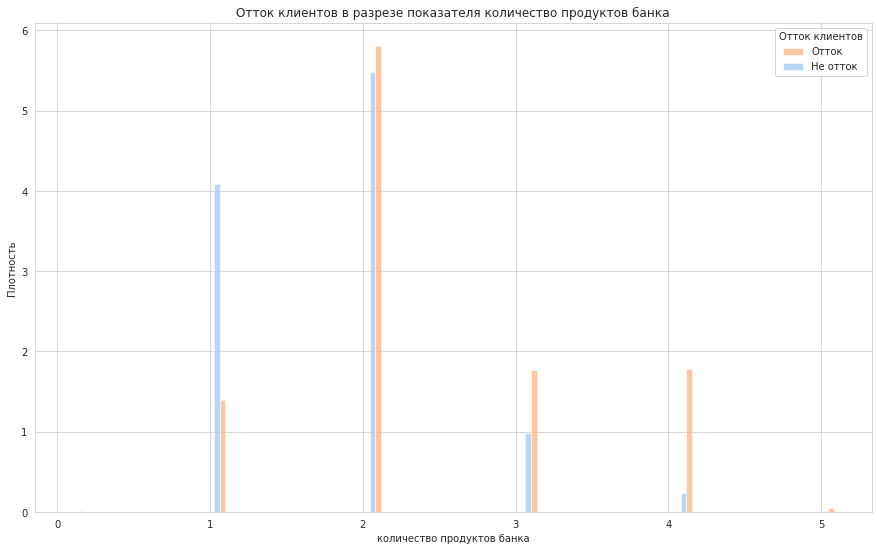

In [118]:
kde_churn(df, 'products', 'количество продуктов банка', num=False)

Самая высокая вероятность попасть в отток у клиентов с 4мя продуктами, самая  низкая у клиентов с 1 продуктом.

Таким образом, в отток вероятнее всего попадает клиент:
* мужчина
* из Ярославля
* в возрасте от 23 до 35 или 48 до 61 лет
* с кредитным скорингом от 820 до 910
* балансом на счете более 800 000
* с кредитной картой
* активный в последний месяц
* клиент с 4мя продуктами, 
* оценочным доходом выше 90 000 
* и 9 баллами собственности. 


#### Сравнение относительных показателей оттока в сформированных группах

Посмотрим на отток в сформированных группах в разрезе других показателей

In [119]:
#функция, изображающая оценку графика плотности по группам
def kde_churn_group(df, column, label, num=True):
    g = sns.FacetGrid (data=df, col='products', hue="churn", col_wrap= 3, height=4 )
    if num==True:
        g.map(sns.kdeplot, column, common_norm=False, fill=True) 
    else:
        g.map(sns.histplot, column, common_norm=False, stat='density', multiple="dodge", shrink=0.8, alpha=0.5)
        
    g.add_legend()
    g.set_xlabels(label)
    g.set_titles();
    g.set_ylabels('Плотность')
    g.fig.subplots_adjust(top=0.9) 
    g.fig.suptitle('Распределение оттока клиентов по показателю ' + label + ' в разрезе групп');

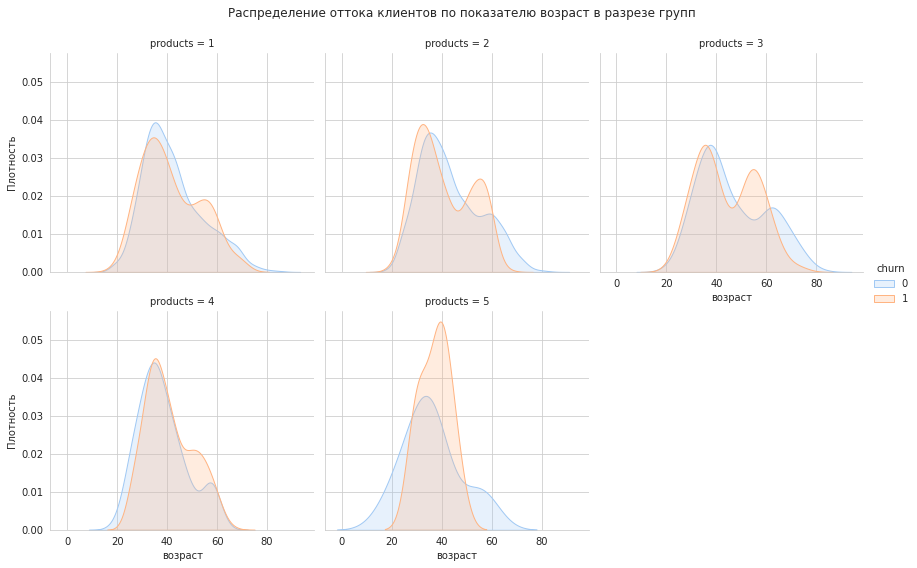

In [120]:
kde_churn_group(df.loc[df['products'] != 0], 'age', 'возраст')

* Для группы 1 характерно небольшое преобладание оттока для клиентов в возрасте от 20 до 30 лет, и заметное преобладание оттока в возрасте от 50 до 62 лет. В возрасте от 30 до 50 и старше 62 лет характерно преобладание клиентов, остающихся в банке.

* Для группы 2 также характерно преобладание оттока для клиентов в возрасте от 20 до 35 лет, и заметное преобладание оттока в возрасте от 50 до 60 лет. В возрасте от 35 до 50 и старше 60 лет характерно преобладание клиентов, остающихся в банке.

* Для группы 3 также характерно преобладание оттока для клиентов в возрасте от 20 до 37 лет, и заметное преобладание оттока в возрасте от 47 до 60 лет. В возрасте от 37 до 49 и старше 60 лет характерно преобладание клиентов, остающихся в банке.

* Для группы 4 в возрасте от 18 до 30 лет клиенты чаще остаются клиентами банка, в возрасте от 40-42 и старше 60 лет шансы как остаться, так и уйти из банка примерно одинаковые, а вот от 47 до 58 лет вероятность оттока клиента возрастает.

* Для группы 5 в возрасте от 18 до 28 лет и старше 50 лет клиенты чаще остаются клиентами банка, а вот вероятность попасть в отток довольно высокая в возрасте от 30 до 50 лет.

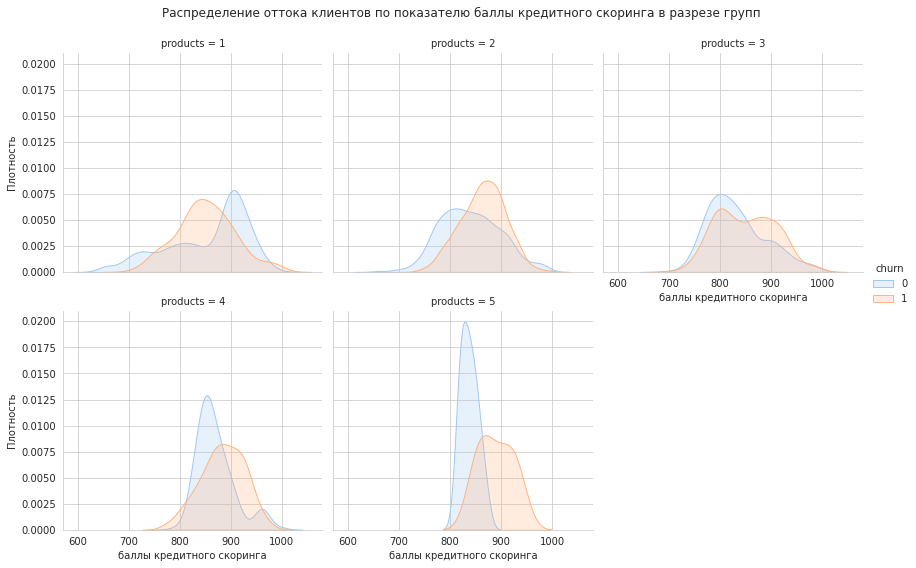

In [121]:
kde_churn_group(df.loc[df['products'] != 0], 'score', 'баллы кредитного скоринга')

* В 1 группе клиенты с баллами от 650 до 750 и от 890 до 960 чаще остаются в банке, с баллами от 750 до 880 чаще попадают в отток.

* Во 2 группе клиенты с баллами от 650 до 840 и свыше 950 чаще остаются в банке, с баллами от 840 до 950 чаще попадают в отток
* В 3 группе клиенты с баллами от 730 до 850 чаще остаются в банке, а с баллами от 850 до 950 чаще попадают в отток
* В 4 группе клиенты с баллами от 750 до 800 и от 870 до 950 чаще остаются в банке, с баллами от 820 до 880 заметно чаще попадают в отток.

* В 5 группе клиенты с баллами от 800 до 850 намного чаще остаются  в банке, а вот начиная от 900 баллов и вовсе 100% покидают банк.


In [122]:
df.loc[df['products'] != 0].pivot_table(index = 'gender', columns='products', values='churn')

products,1,2,3,4,5
gender,,,,,
Ж,0.041912,0.127803,0.213198,0.558659,0.333333
М,0.095212,0.260336,0.382550,0.677966,0.500000


Во всех группах в отток чаще попадают клиенты мужского пола.


In [123]:
df.loc[df['products'] != 0].pivot_table(index = 'city', columns='products', values='churn')

products,1,2,3,4,5
city,,,,,
Ростов,0.110360,0.188820,0.284211,0.544118,0.0
Рыбинск,0.065344,0.179487,0.212121,0.646465,1.0
Ярославль,0.064293,0.198257,0.302057,0.648208,0.5


В 1 группе чаще в отток попадают клиенты из Ростова, в остальных чаще в отток попадают клиенты из Ярославля.

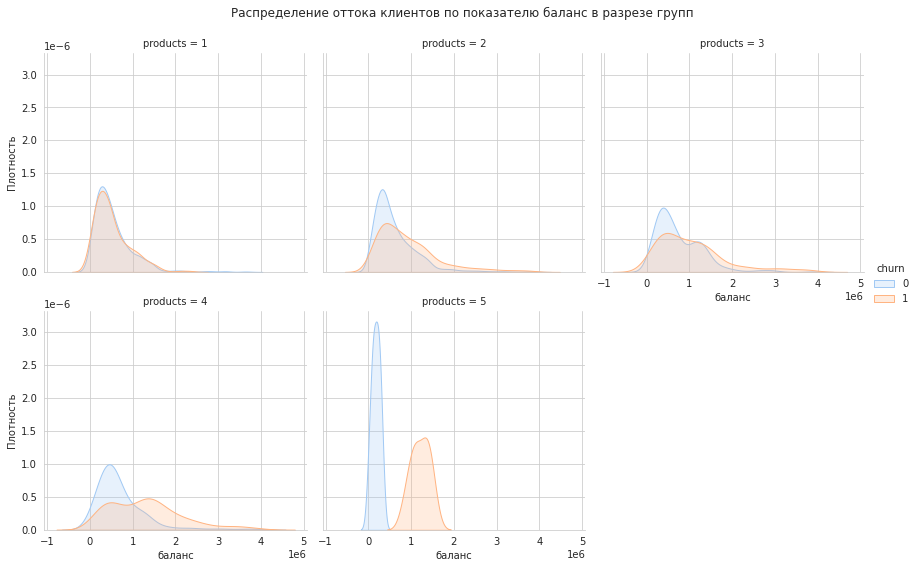

In [124]:
kde_churn_group(df.query('balance < 4000000'), 'balance', 'баланс')

* В группе 1 шансы как остаться в банке, так и уйти из него примерно одинаковые.
* В группе 2 шансы остаться в банке выше с балансом до 1 000 000, с балансом выше 1 млн чаще попадают в отток.
* В группе 3 шансы остаться в банке выше с балансом до 800 000, с балансом выше 800 000 чаще попадают в отток.
* В группе 4 шансы осаться в банке выше с балансом до 1 000 000, с балансом выше 1млн чаще попадают в отток.
* В группе 5 с балансом до 500 000 клиенты остаются в банке, свыше 500 000 - покидают.

In [125]:
df.loc[df['products'] != 0].pivot_table(index = 'last_activity', columns='products', values='churn')

products,1,2,3,4,5
last_activity,,,,,
0,0.050955,0.099597,0.199670,0.910000,1.000000
1,0.088420,0.276999,0.407407,0.558824,0.352941


В 1 и 2 группах чаще в отток попадают  активные клиенты, в остальных группах в чаще в отток попадают неактивные клиенты. 

In [126]:
df.loc[df['products'] != 0].pivot_table(index = 'credit_card', columns='products', values='churn')


products,1,2,3,4,5
credit_card,,,,,
0,0.050773,0.275052,0.300448,0.423841,NaN
1,0.073868,0.140805,0.260163,0.730650,0.421053


В 1, 4 и 5 группах чаще в отток попадают  клиенты с кредитной картой, во 2 и 3  клиенты без кредитной карты.

In [127]:
df.loc[df['products'] != 0].pivot_table(index = 'equity', columns='products', values='churn')

products,1,2,3,4,5
equity,,,,,
0,0.018377,0.069470,0.155172,0.583333,NaN
1,0.070588,0.122685,0.211268,0.538462,0.000000
2,0.146597,0.131171,0.205128,0.656250,0.000000
3,0.145833,0.186735,0.236181,0.685714,0.333333
4,0.149502,0.226714,0.295620,0.604651,0.400000
5,0.183746,0.261054,0.375000,0.633136,0.714286
6,0.296296,0.275000,0.400000,0.620690,NaN
7,0.312500,0.447368,0.400000,0.687500,NaN
8,0.000000,0.272727,0.500000,1.000000,NaN


In [128]:
df['equity'].value_counts(normalize=True)

0    0.258272
5    0.191999
4    0.185181
3    0.154502
2    0.105374
1    0.077502
6    0.016142
7    0.008021
8    0.001704
9    0.001303
Name: equity, dtype: float64

В 1 и 2 группах самая высокая вероятность попасть в отток у клиентов с 9 баллами собственности. В 3ей - 8 и 9, в 4ой - с 8 баллами, в 5ой - с 5 баллами. В 4ой группе у клиентов со всеми баллами собственности вероятность попасть в отток превышает 50%. 

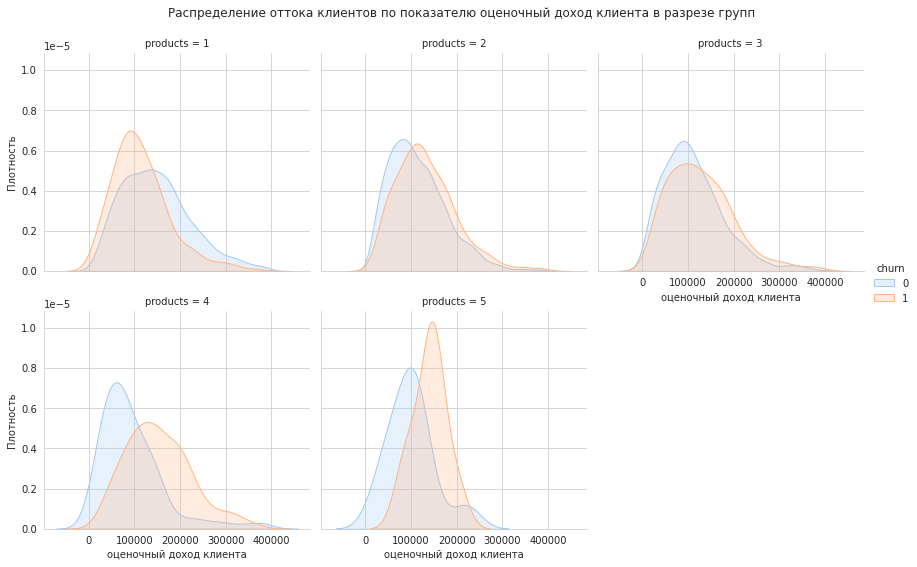

In [129]:
kde_churn_group(df.loc[df['products'] != 0].query('est_salary < 400000'), 'est_salary', 'оценочный доход клиента')

* У клиентов 1 группы с оценочным доходом до 150 000 шанс попасть в отток выше, при оценочном доходе выше 150 000 клиенты чаще остаются в банке
* Во 2 группе клиенты с оценочным доходом до 100 000 немного чаще остаются в банке, при оценочном доходе выше 100 000 шанс оттока немного больше
* В 3 группе клиенты с оценочным доходом до 130 000 немного чаще остаются в банке, при оценочном доходе выше 130 000 шанс оттока немного больше
* В 4 группе клиенты с оценочным доходом до 100 000 чаще остаются в банке, при оценочном доходе выше 100 000 шанс оттока больше
* В 5 группе клиенты с оценочным доходом до 110 000 чаще остаются в банке, при оценочном доходе выше 120 000 шанс оттока больше

#### Корреляционный анализ показателей с целью выявления возможных причин оттока пользователей в банке в целом и по группам

Так как признаки в наборе данных разной природы: номинальные, ранговые, числовые (интервальные и шкалы отношений), то для вычисления корреляционного коэффициента между признаками воспользуемся $\phi_k$ коэффициентом корреляции.

In [130]:
#создаем список интервальных (числовых) переменных
data_types = {'score': 'interval',
              'city': 'categorical',
              'gender': 'categorical',
             'age':'interval',
             'equity':'ordinal',
             'balance':'interval',
             'products':'ordinal',
             'credit_card':'categorical',
             'last_activity':'categorical',
              'est_salary':'interval',
             'churn':'categorical'}

interval_cols = [col for col, v in data_types.items() if v=='interval' and col in df.columns]
interval_cols

#уберем из переменных для корреляции ид клиента
phik_overview = df.drop('user_id', axis=1).phik_matrix(interval_cols=interval_cols)

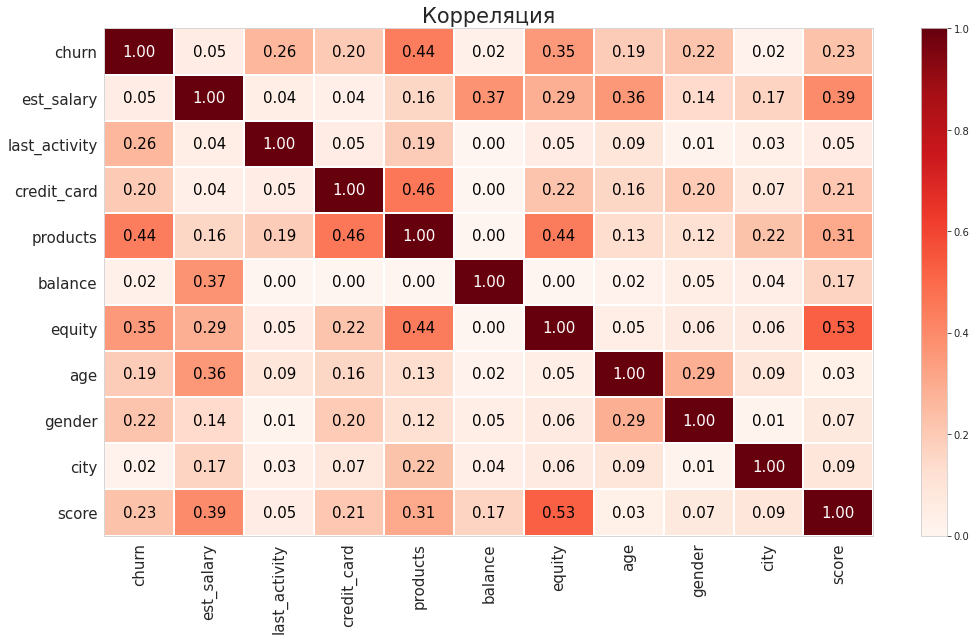

In [131]:
plot_correlation_matrix(phik_overview.values, x_labels=phik_overview.columns, y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map='Reds', title='Корреляция', fontsize_factor=1.5,
                        figsize=(15,9))
plt.tight_layout()

Как видно из корреляционной матрицы, самый высокий из представленных коэффициентов наблюдается между количеством баллов собственности и кредитным скорингом - 0.53, что соответствует положительной по направлению и средней по силе корреляции. Слабая по силе и положительная по направлению корреляция наблюдается между наличием кредитной карты и количеством используемых продуктов банка клиентом (0.46), между количеством баллов собственности и наличием кредитной карты (0.44), между оттоком и количеством используемых продуктов банка клиентом (0.44), между оценочным доходом клиента и кредитным скорингом (0.39), между между оценочным доходом клиента и балансом на счете (0.37), между оценочным доходом клиента и возрастом (0.36), между оттоком и оличеством баллов собственности (0.35). 

Исходя из этого, нельзя выделить какой-то показатель, который взаимосвязан с оттоком клиента из банка в целом. 

#### Общий вывод

На этом этапе были построены:
* портрет типичного клиента банка
* портрет типичного клиента банка по количеству используемых им продуктов
* был исследован отток клиентов в целом и по группам в разрезе других признаков
* были исследованы возможные причины оттока клиентов из банка

### Статистический анализ данных

#### проверить гипотезу различия возраста между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним

*Нулевая гипотеза:* средний возраст клиентов, которые пользуются двумя продуктами банка, и средний возрастом тех, кто пользуется одним одинаковый.

*Альтернативная гипотеза:* средний возраст клиентов, которые пользуются двумя продуктами банка, отличается от среднего возраста тех, кто пользуется одним.

Сформируем теперь соответствующие выборки и перейдем к выбору статистического критерия и уровня статистической значимости.

In [132]:
#формируем выборки
age_2 = df.loc[df['products'] == 2, 'age']
age_1 = df.loc[df['products'] == 1, 'age']

In [133]:
print('Размер группы 2:', len(age_2))
print('Размер группы 1:', len(age_1))

Размер группы 2: 5119
Размер группы 1: 3323


Проверим, каким распределением обладают выборки age_2 и age_1, чтобы выбрать статистический критерий для проверки гипотез. Для проверки на нормальность воспользуемся критерием Колмогорова-Смирнова, поскольку количество наблюдений больше 5000 (для группы 2) и критерием Шапиро-Уилка поэтому нельзя воспользоваться. В качестве уровня значимости выберем $\alpha = 0.01$

In [134]:
alpha = 0.01 

results = st.kstest(age_2, 'norm')
p_value = results[1] 

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально') 

p-значение:  0.0
Отвергаем нулевую гипотезу: распределение не нормально


In [135]:
alpha = 0.01 

results = st.kstest(age_1, 'norm')
p_value = results[1] 

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально') 

p-значение:  0.0
Отвергаем нулевую гипотезу: распределение не нормально


In [136]:
# Function to create a sampling distribution of the mean
def sampling_distribution(population, sample_size, n_samples):
    sample_means = []
    for _ in range(n_samples):
        sample = population.sample(frac=1, replace=True)
        sample_means.append(np.mean(sample))
    return sample_means

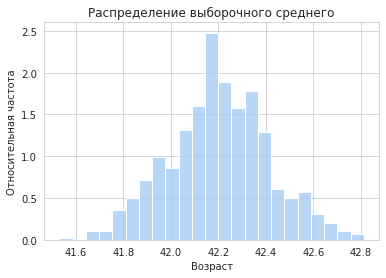

In [137]:
sample_means = sampling_distribution(age_1, sample_size=30, n_samples=1000)

sns.histplot(sample_means, stat='density')
plt.title('Распределение выборочного среднего')
plt.xlabel('Возраст')
plt.ylabel("Относительная частота");

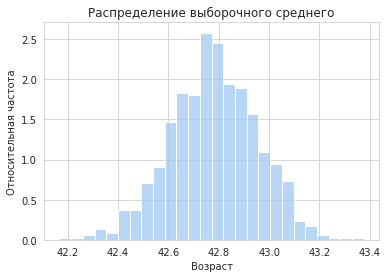

In [138]:
sample_means = sampling_distribution(age_2, sample_size=30, n_samples=1000)

sns.histplot(sample_means, stat='density')
plt.title('Распределение выборочного среднего')
plt.xlabel('Возраст')
plt.ylabel("Относительная частота");

In [139]:
print('Размер группы 2:', len(age_2))
print('Размер группы 1:', len(age_1))

len(age_2) / len(age_1)
print('Минимальное: ', round(age_1.min(), 2), 
      'максимальное: ', round(age_1.max(), 2), 
      'стандартное отклонение: ', round(age_1.std(), 2))
print('Минимальное: ', round(age_2.min(), 2), 
      'максимальное: ', round(age_2.max(), 2),
     'стандартное отклонение: ', round(age_2.std(), 2))

print((round(age_1.std(), 2) - round(age_2.std(), 2)) / round(age_1.std(), 2) * 100)

Размер группы 2: 5119
Размер группы 1: 3323
Минимальное:  18 максимальное:  86 стандартное отклонение:  11.99
Минимальное:  18 максимальное:  84 стандартное отклонение:  12.16
-1.417848206839032


Выборки различаются размером, категории пользователей разные (по количеству продуктов), однако размах значений у них схожий, стандартное отклонение различается всего на 1.5%, поэтому я возьму критерий с предположением о равенстве дисперсий.

Распределение средних выборочных нормальное, выборки независимы (в силу их формирования), по формулировке статистической гипотезы нас просят найти различие (не важно в какую сторону), поэтому нужно использовать двусторонний критерий Стьюдента для независимых выборок с предположением о равенстве дисперсий. 

In [140]:
alpha = 0.01 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(age_1, age_2)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.03351546829239861
Не получилось отвергнуть нулевую гипотезу


Так как p.value 0.03351546829239861 больше заданного значения 0.01, нулевую гипотезу нельзя отвергнуть, то есть  **между группами различий в среднем возрасте нет.**  

#### проверить гипотезу различия в баллах кредитного скоринга между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются тремя

*Нулевая гипотеза:* средний балл кредитного скоринга клиентов, которые пользуются двумя продуктами банка, и средний балл кредитного скоринга тех, кто пользуется тремя одинаковый.

*Альтернативная гипотеза:* средний балл кредитного скоринга клиентов, которые пользуются двумя продуктами банка, отличается от среднего балла кредитного скоринга тех, кто пользуется тремя.

Сформируем теперь соответствующие выборки и перейдем к выбору статистического критерия и уровня статистической значимости.

In [141]:
#формируем выборки
score_2 = df.loc[df['products'] == 2, 'score']
score_3 = df.loc[df['products'] == 3, 'score']

In [142]:
print('Размер группы 2:', len(score_2))
print('Размер группы 3:', len(score_3))

Размер группы 2: 5119
Размер группы 3: 1038


Проверим, каким распределением обладают выборки score_2 и score_3, чтобы выбрать статистический критерий для проверки гипотез. Для проверки на нормальность воспользуемся критерием Колмогорова-Смирнова, поскольку количество наблюдений больше 5000 (для группы 2) и критерием Шапиро-Уилка поэтому нельзя воспользоваться. В качестве уровня значимости выберем $\alpha = 0.01$

In [143]:
alpha = 0.01 

results = st.kstest(score_2, 'norm')
p_value = results[1] 

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально') 

p-значение:  0.0
Отвергаем нулевую гипотезу: распределение не нормально


In [144]:
alpha = 0.01 

results = st.kstest(score_3, 'norm')
p_value = results[1] 

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально') 

p-значение:  0.0
Отвергаем нулевую гипотезу: распределение не нормально


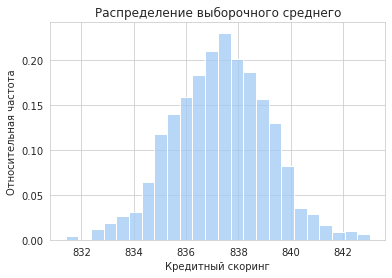

In [145]:
sample_means = sampling_distribution(score_3, sample_size=30, n_samples=1000)

sns.histplot(sample_means, stat='density')
plt.title('Распределение выборочного среднего')
plt.xlabel('Кредитный скоринг')
plt.ylabel("Относительная частота");

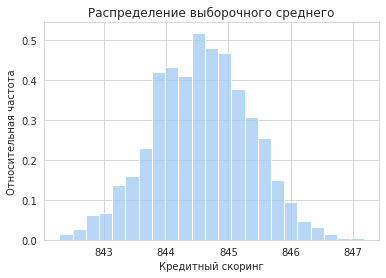

In [146]:
sample_means = sampling_distribution(score_2, sample_size=30, n_samples=1000)

sns.histplot(sample_means, stat='density')
plt.title('Распределение выборочного среднего')
plt.xlabel('Кредитный скоринг')
plt.ylabel("Относительная частота");

In [147]:
print('Размер группы 2:', len(score_2))
print('Размер группы 3:', len(score_3))

len(score_2) / len(score_3)
print('Минимальное: ', round(score_2.min(), 2), 
      'максимальное: ', round(score_2.max(), 2), 
      'стандартное отклонение: ', round(score_2.std(), 2))
print('Минимальное: ', round(score_3.min(), 2), 
      'максимальное: ', round(score_3.max(), 2),
     'стандартное отклонение: ', round(score_3.std(), 2))

print((round(score_2.std(), 2) - round(score_3.std(), 2)) / round(score_2.std(), 2) * 100)

Размер группы 2: 5119
Размер группы 3: 1038
Минимальное:  646 максимальное:  1000 стандартное отклонение:  57.95
Минимальное:  689 максимальное:  996 стандартное отклонение:  58.15
-0.34512510785158884


Выборки различаются размером, категории пользователей разные (по количеству продуктов), однако размах значений у них схожий, стандартное отклонение различается менее чем на 0.5%, поэтому я возьму критерий с предположением о равенстве дисперсий.

Распределение средних выборочных нормальное, выборки независимы (в силу их формирования), по формулировке статистической гипотезы нас просят найти различие (не важно в какую сторону), поэтому нужно использовать двусторонний критерий Стьюдента для независимых выборок с предположением о равенстве дисперсий.

In [148]:
alpha = 0.01 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(score_2, score_3)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.00021098350952428928
Отвергаем нулевую гипотезу


Так как p.value 0.00021098350952428928 меньше заданного значения 0.01, отвергаем нулевую гипотезу, то есть **между группами различия в среднем балле кредитного скоринга есть.** 

#### проверить гипотезу о равенстве долей оттока среди мужчин и женщин банков

*Нулевая гипотеза:* доли оттока среди мужчин и женщина равны

*Альтернативная гипотеза:* доли оттока среди мужчин и женщина разные

Гипотезу о равенстве долей проверяют с помощью z-теста.

Подготовим все необходимые данные для проведения теста.

In [149]:
churn = np.array([len(df.loc[(df['gender'] == 'Ж') & (df['churn'] == True)]),
                  len(df.loc[(df['gender'] == 'М') & (df['churn'] == True)])])
gender_len = np.array([len(df.loc[df['gender'] == 'Ж']),
                  len(df.loc[df['gender'] == 'М'])])

In [150]:
alpha = 0.05

p1 = churn[0]/gender_len[0]
p2 = churn[1]/gender_len[1]
p_combined = (churn[0] + churn[1]) / (gender_len[0] + gender_len[1])
difference = p1 - p2 
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/gender_len[0] + 1/gender_len[1])) 

distr = st.norm(0, 1) 
p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'
    )

p-значение:  0.0
Отвергаем нулевую гипотезу: между долями есть значимая разница


Так как p-значение меньше заданного уровня 0.05, принимаем альтернативную гипотезу: между пропорциями в оттоке клиентов по полу есть значимые различия.

#### Общий вывод


На этом этапе было проверено 3 статистических гипотезы. Для каждой статистической гипотезы были сформулированы нулевая и альтернативная гипотезы, выбран статистический критерий с обоснованием, проведен статистический тест и сделан вывод.

### Промежуточный итог с обоснованием выбора показателей для сегментации пользователей

На основе проведенного исследовательского анализа можно сделать следующие выводы:
* в наборе данных примерно одинаковое соотношение мужчин и женщин, больше всего клиентов из Ярославля, у большинства есть кредитная карта.
* Среднестатистический портрет клиента банка в целом такой:
    + мужчина
    + из Ярославля
    + в возрасте 40 лет,
    + с 853 баллами кредитного скоринга,
    + с 3 баллами собственности
    + с балансом на счете 524 295.3
    + владеющий двумя продуктами банка
    + с кредитной картой
    + активный в последний месяц
    + с оценочной собственностью в 119 626.8
    + который не склонен уйти из банка
* Клиенты были разбиты на 6 групп по количеству имеющихся у них продуктов банка. Самая многочисленная группа - с двумя продуктами - 51.3%, в группе с 1 продуктом 33.3%. 
    Отличительные особенности получившихся групп:
    + самым высоким медианным кредитным скорингом обладают клиенты 1 группы, самый низкий - у клиентов группы 3.
    + медианный возраст в группах колеблется от 37 до 42 лет
    + самый высокий медианный баланс на счете у клиентов 4 группы, самый низкий - у 5. Практически в каждой группе есть выбивающиеся значения
    + большинство клиентов из Ярославля
    + в 1, 4 и 5 группах большинство клиентов мужского пола, во 2 и 3 - женского пола
    + В 1 группе значительно преобладают клиент с 0 баллами собственности, в остальных группах лидирующую позицию занимают клиенты с  5 баллами собственности
    + Только в 3ей группе у большинства клиентов нет кредитной карты. Следует отметить, что в группе с одним продуктом у большинства есть кредитная карта, то есть эта группа является заещиками этого банка.
    + Только в 3 группе большинство клиентов не было активным в последний месяц. В 4 и 5 группах активным было подавляющее большинство
    + В 4 группе большинство клиентов ушло из банка, в 5 группе неушедших из банка больше, чем ушедших, но соотношение не такое большое, эта группа находится в зоне риска, в 1-3 группе количество клиентов, оставшихся с банком, значительно превышает количество клиентов, попавших в отток (особенности в 1 и 2).
    + Самый высокий медианный доход у клиентов 1 группы - около 140000, самый низкий в 3 группе, чуть больше 100000.
    
* Исследуя отток в целом по банку в разрезе других показателей было получено, что:
    + отток преобладает у клиентов в возрасте от 23 до 35 и от 48 до 61, в возрасте от 35 до 48 лет и после 61 года вероятность попасть в отток ниже
    + вероятность клиентов с баллами кредитного скоринга от 820 до 910 выше попасть в отток. В свою очередь клиенты с баллами от 650 до 820 и от 950 до 990 вероятнее останутся клиентами банка
    + клиенты с балансом на счёте до 800 000 значительно реже попадают в отток, клиенты с балансом выше 800 000 чаще попадают в отток
    + клиенты с оценочным доходом от 20 000 до до 80 000 реже попадают в отток, клиенты с ценочным доходом выше 90 000 чаще попадают в отток
    + мужчины чаще всего попадают в отток, женщины в свою очередь предпочитают оставаться клиентом банка
    + клиенты с кредитной картой как чаще попадают в отток, так и остаются клиентами банка
    + чаще других попадают в отток, а также остаются клиентами банка жители Ярославля
    + клиенты с активностью в последний месяц чаще попадают в отток, неактивные клиенты чаще остаются в банке
    + самая высокая вероятность попасть у клиентов с 9 баллами собственности.
    + самая высокая вероятность попасть в отток у клиентов с 4мя продуктами, самая низкая у клиентов с 1 продуктом.
    
* При изучении оттока в срезе групп отличительными особенностями было получено следующее:
    + в 5 группе в отток чаще попадают клиенты в возрасте от 30 до 50 лет, когда в других группах в этом возрасте клиенты вероятность остаться в банке выше или равна вероятности попасть в отток
    + в 1 группе в отток чаще попадают клиенты с кредитным скорингом от 750 до 880 баллов, когда в других группах примерно в этом же диапазоне вероятность остаться в банке больше
    + во всех группах в отток чаще попадают клиенты мужского пола
    + в 1 группе чаще в отток попадают клиенты из Ростова, в остальных чаще в отток попадают клиенты из Ярославля.
    + в группе 1 баланс не влияет на попадание клиента в отток, значительная разница в вероятности наблюдается у клиентов 5 группы: с балансом до 500 000 клиенты остаются в банке, свыше 500 000 - покидают, во 2-4 группах вероятность остаться в банке больше с балансом до 800 000 - 1 000 000
    + в 1 и 2 группах чаще в отток попадают активные клиенты, в остальных группах в чаще в отток попадают неактивные клиенты.
    + в 1, 4 и 5 группах чаще в отток попадают клиенты с кредитной картой, во 2 и 3 клиенты без кредитной карты.
    + в 1 и 2 группах самая высокая вероятность попасть в отток у клиентов с 9 баллами собственности. В 3ей - 8 и 9, в 4ой - с 8 баллами, в 5ой - с 5 баллами. В 4ой группе у клиентов со всеми баллами собственности вероятность попасть в отток превышает 50%.
    + у клиентов 1 группы с оценочным доходом до 150 000 шанс попасть в отток выше, когда в других группах с таким же доходом вероятность остаться клиентом больше, чем попасть в отток.
    
+ в ходе корреляционного анализа было получено, что по всем клиентам банка в целом и по группам отдельно, кроме непоказательной 5(так как группа малочисленная), между оттоком клиентов и другими признаками наблюдается слабая корреляция.


В результате статистического анализа данных было получено, что:
* статистически значимых различий (на уровне 0.01) между группами с 1 и 2 продуктами в среднем возрасте нет.
* статистически значимые различия (на уровне 0.01) между группами с 2 и 3 продуктами в среднем балле кредитного скоринга есть.
* между пропорциями в оттоке клиентов по полу есть значимые различия.


На основе вышеизложенного, при сегментации пользователей буду опираться на количество продуктов, количество человек в группе и выбивающиеся, отличительные от других групп, показатели.


### Сегментация пользователей на основе выделенных показателей


#### сформировать на основе получившихся отличительных черт более компактные группы

Перечисленное в пункте 5 позволяет выделить такие сегменты:
1. **Сегмент 1** - клиенты из группы с 1 продуктом, у которых:
    * кредитный скоринг в пределах от 750 до 880 баллов
    * с оценочным доходом до 150 000
    
    Обращаем внимание в первую очередь на эти показатели, так как с такими значниями этих покателей в других группах клиенты чаще остаются клиентами банка.
    
2. **Сегмент 2** - клиенты из группы с 2 или 3 ~~или 4 мя продуктами~~:
    * у которых нет кредитной карты
    * мужчина
    
~~3. **Сегмент 3** - клиенты из группы с 5 продуктами (несмотря на свою малочисленность):~~
   ~~* возраст от 28 до 50 лет~~
    ~~* мужчина~~
    ~~* с оценочным доходом выше 120 000~~
    
3. **Сегмент 3** - клиенты из группы с 4 или 5ью продуктами (у которых самый высокий отток среди других групп):
    * возраст от 30 и старше
    *  с оценочным доходом выше 100 000

#### посчитать ключевые показатели

In [151]:
#формируем сегмент 1
segm_1 = df.query('(products == 1) & (score >= 750) & (score <= 880) & (est_salary <= 150000)')
print('Доля клиентов сегмента 1 от общего числа клиентов: ', round(len(segm_1) / len(df) * 100, 2))
print('Доля оттока внутри сегмента: ', round(len(segm_1[segm_1['churn'] == True]) / len(segm_1) * 100, 2))
print('Доля оттока в целом: ', round(len(segm_1[segm_1['churn'] == True]) / len(df[df['churn'] == True]) * 100, 2))

Доля клиентов сегмента 1 от общего числа клиентов:  8.47
Доля оттока внутри сегмента:  14.2
Доля оттока в целом:  6.6


In [152]:
segm_1.describe()

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,845.000000,845.000000,845.000000,845.000000,7.960000e+02,845.0,845.000000,845.000000,845.000000,845.000000
mean,172894.017751,819.884024,42.514793,2.778698,4.583237e+05,1.0,0.887574,0.499408,83284.522166,0.142012
std,33058.876706,35.393834,13.123234,1.752999,5.424715e+05,0.0,0.316077,0.500296,36175.868714,0.349269
min,100920.000000,751.000000,18.000000,0.000000,7.982700e+02,1.0,0.000000,0.000000,8587.790000,0.000000
25%,144199.000000,792.000000,32.000000,1.000000,2.117376e+05,1.0,1.000000,0.000000,53961.380000,0.000000
50%,174820.000000,820.000000,39.000000,3.000000,3.658972e+05,1.0,1.000000,0.000000,82383.630000,0.000000
75%,201038.000000,850.000000,52.000000,4.000000,5.823381e+05,1.0,1.000000,1.000000,111322.480000,0.000000
max,228715.000000,880.000000,86.000000,8.000000,1.282321e+07,1.0,1.000000,1.000000,149948.030000,1.000000


In [153]:
segm_1.groupby('gender')['churn'].value_counts(normalize=True)

gender  churn
Ж       0        0.933492
        1        0.066508
М       0        0.783019
        1        0.216981
Name: churn, dtype: float64

In [154]:
segm_1['gender'].value_counts(normalize=True)

М    0.501775
Ж    0.498225
Name: gender, dtype: float64

In [155]:
segm_1['equity'].value_counts(normalize=True)

3    0.200000
4    0.200000
5    0.155030
2    0.149112
0    0.145562
1    0.121893
6    0.017751
7    0.008284
8    0.002367
Name: equity, dtype: float64

In [156]:
segm_1['credit_card'].value_counts(normalize=True)

1    0.887574
0    0.112426
Name: credit_card, dtype: float64

В сегменте 1 попало около 8.5% от всего числа клиентов банка, средин них 6.6% составляют от общего оттока и внутри сегмента 14.2%. Количество мужчин и женщин в этом сегменте одинаковое, среди мужчин отток выше. Средний показатель кредитного скоринга - 820 (ввиду отброса выбросов), медианный возраст 39 лет, количество баллов собственности 3 или 4, с кредитной картой, медианным балансом - 365 897.2, оценочным доходом - 82 383.

In [157]:
#формируем сегмент 2
segm_2 = df.query('((products == 2) | (products == 3)) & (credit_card == 0) & (gender == "М")')
segm_2
print('Доля клиентов сегмента 2 от общего числа клиентов: ', round(len(segm_2) / len(df) * 100, 2))
print('Доля оттока внутри сегмента: ', round(len(segm_2[segm_2['churn'] == True]) / len(segm_2) * 100, 2))
print('Доля оттока в целом: ', round(len(segm_2[segm_2['churn'] == True]) / len(df[df['churn'] == True]) * 100, 2))

Доля клиентов сегмента 2 от общего числа клиентов:  10.05
Доля оттока внутри сегмента:  40.42
Доля оттока в целом:  22.26


In [158]:
segm_2['churn'].value_counts(normalize=True)

0    0.595808
1    0.404192
Name: churn, dtype: float64

In [159]:
segm_2['equity'].value_counts(normalize=True)

5    0.320359
4    0.239521
3    0.165669
2    0.097804
0    0.070858
1    0.050898
6    0.029940
7    0.017964
8    0.003992
9    0.002994
Name: equity, dtype: float64

In [160]:
segm_2.describe()

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,1002.000000,1002.000000,1002.000000,1002.000000,9.600000e+02,1002.000000,1002.0,1002.000000,1.002000e+03,1002.000000
mean,174561.620758,859.042914,42.239521,3.667665,1.290174e+06,2.255489,0.0,0.528942,1.552812e+05,0.404192
std,34235.079029,57.443463,11.005970,1.667798,2.231313e+06,0.436354,0.0,0.499411,1.391698e+05,0.490980
min,96562.000000,718.000000,19.000000,0.000000,2.200000e+01,2.000000,0.0,0.000000,1.067773e+04,0.000000
25%,146597.500000,816.000000,34.000000,3.000000,3.990909e+05,2.000000,0.0,0.000000,8.199380e+04,0.000000
50%,175333.000000,863.000000,40.000000,4.000000,8.206745e+05,2.000000,0.0,1.000000,1.287194e+05,0.000000
75%,203828.000000,901.000000,51.000000,5.000000,1.394153e+06,3.000000,0.0,1.000000,1.828809e+05,1.000000
max,229058.000000,1000.000000,74.000000,9.000000,4.327710e+07,3.000000,0.0,1.000000,1.395064e+06,1.000000


В сегмент 2 попало около 10% от всего числа клиентов банка, средин них 22.26% составляют от общего оттока и внутри сегмента 40%. Медианный показатель кредитного скоринга - 863, медианный возраст 40 лет, количество баллов собственности 5, без кредитной карты, медианным балансом - 820 674.5, оценочным доходом - 128 719.4.

In [161]:
#формируем сегмент 3
segm_3 = df.query('((products == 4) | (products == 5)) & (age >= 30) & (est_salary >= 100000)')
segm_2
print('Доля клиентов сегмента 3 от общего числа клиентов: ', round(len(segm_3) / len(df) * 100, 2))
print('Доля оттока внутри сегмента: ', round(len(segm_3[segm_3['churn'] == True]) / len(segm_3) * 100, 2))
print('Доля оттока в целом: ', round(len(segm_3[segm_3['churn'] == True]) / len(df[df['churn'] == True]) * 100, 2))

Доля клиентов сегмента 3 от общего числа клиентов:  2.9
Доля оттока внутри сегмента:  76.12
Доля оттока в целом:  12.09


In [162]:
segm_3.describe()

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,289.000000,289.000000,289.000000,289.000000,2.890000e+02,289.000000,289.000000,289.000000,2.890000e+02,289.000000
mean,171913.245675,887.830450,41.519031,4.162630,1.670252e+06,4.038062,0.730104,0.730104,2.027888e+05,0.761246
std,37335.285550,44.515474,7.614438,1.363406,1.519963e+06,0.191679,0.444676,0.444676,1.368535e+05,0.427062
min,97557.000000,768.000000,30.000000,0.000000,4.027084e+04,4.000000,0.000000,0.000000,1.000530e+05,0.000000
25%,141206.000000,856.000000,35.000000,3.000000,7.671735e+05,4.000000,0.000000,0.000000,1.312753e+05,1.000000
50%,171822.000000,885.000000,40.000000,4.000000,1.370603e+06,4.000000,1.000000,1.000000,1.625442e+05,1.000000
75%,208116.000000,923.000000,46.000000,5.000000,2.036988e+06,4.000000,1.000000,1.000000,2.195169e+05,1.000000
max,229017.000000,1000.000000,66.000000,9.000000,1.282976e+07,5.000000,1.000000,1.000000,1.048773e+06,1.000000


In [163]:
segm_3

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
81,223978,850,Рыбинск,М,34,5,351583.16,4,0,1,115354.97,1
172,191272,906,Ярославль,Ж,32,4,895645.72,4,0,1,101311.52,0
183,164652,880,Ярославль,Ж,35,5,777716.01,4,0,1,136790.96,0
208,214357,819,Ярославль,М,34,3,1228101.55,4,1,1,141504.44,1
232,214043,881,Ярославль,М,42,3,1206192.01,4,0,0,106611.03,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9885,163071,961,Ярославль,М,38,5,2298650.66,4,1,0,247334.13,0
9915,223285,862,Ростов,М,46,3,1784723.84,4,1,1,202524.28,1
9936,217489,893,Ярославль,Ж,49,5,1571192.11,4,1,1,151217.99,1
9937,187204,957,Ярославль,М,35,4,3431029.03,4,1,0,354987.43,1


In [164]:
segm_3['gender'].value_counts(normalize=True)

М    0.602076
Ж    0.397924
Name: gender, dtype: float64

В сегмент 3 попало около 3% от всего числа клиентов банка, среди них 12% составляют от общего оттока и внутри сегмента 76%. Медианный показатель кредитного скоринга - 885, медианный возраст 340 лет, количество баллов собственности 4, с кредитной картой, медианным балансом - 1 164 820, оценочным доходом - 162 544.2e+05.

#### выделить приоритетные показатели
1. **Сегмент 1:**  
    * количество продуктов 1
    * кредитный скоринг в пределах от 750 до 880 баллов
    * оценочный доход до 150 000

2. **Сегмент 2:**
    * количество продуктов 2 или 3
    * нет кредитной карты
    * мужской пол
    
3. **Сегмент 3:**
    * количество продуктов 4 или 5
    * возраст от 30 лет
    * с оценочным доходом выше 100 000

### Общий вывод и рекомендации для заказчика

1. На этапе предобработки данных было сделано:
* Названия столбцов приведены к змеиному регистру
* Обработаны дубликаты с предварительным их исследованием
* Обработаны пропуски с предварительным их исследованием
* Изучено распределение переменнных
* Изменены типы переменных
2. На основе проведенного исследовательского анализа можно сделать следующие выводы:
* в наборе данных примерно одинаковое соотношение мужчин и женщин, больше всего клиентов из Ярославля, у большинства есть кредитная карта.
* Среднестатистический портрет клиента банка в целом такой:
    + мужчина
    + из Ярославля
    + в возрасте 40 лет,
    + с 853 баллами кредитного скоринга,
    + с 3 баллами собственности
    + с балансом на счете 524 295.3
    + владеющий двумя продуктами банка
    + с кредитной картой
    + активный в последний месяц
    + с оценочной собственностью в 119 626.8
    + который не склонен уйти из банка
* Клиенты были разбиты на 6 групп по количеству имеющихся у них продуктов банка. Самая многочисленная группа - с двумя продуктами - 51.3%, в группе с 1 продуктом 33.3%. 
    Отличительные особенности получившихся групп:
    + самым высоким медианным кредитным скорингом обладают клиенты 1 группы, самый низкий - у клиентов группы 3.
    + медианный возраст в группах колеблется от 37 до 42 лет
    + самый высокий медианный баланс на счете у клиентов 4 группы, самый низкий - у 5. Практически в каждой группе есть выбивающиеся значения
    + большинство клиентов из Ярославля
    + в 1, 4 и 5 группах большинство клиентов мужского пола, во 2 и 3 - женского пола
    + В 1 группе значительно преобладают клиент с 0 баллами собственности, в остальных группах лидирующую позицию занимают клиенты с  5 баллами собственности
    + Только в 3ей группе у большинства клиентов нет кредитной карты. Следует отметить, что в группе с одним продуктом у большинства есть кредитная карта, то есть эта группа является заещиками этого банка.
    + Только в 3 группе большинство клиентов не было активным в последний месяц. В 4 и 5 группах активным было подавляющее большинство
    + В 4 группе большинство клиентов ушло из банка, в 5 группе неушедших из банка больше, чем ушедших, но соотношение не такое большое, эта группа находится в зоне риска, в 1-3 группе количество клиентов, оставшихся с банком, значительно превышает количество клиентов, попавших в отток (особенности в 1 и 2).
    + Самый высокий медианный доход у клиентов 1 группы - около 140000, самый низкий в 3 группе, чуть больше 100000.
    
* Исследуя отток в целом по банку в разрезе других показателей было получено, что:
    + отток преобладает у клиентов в возрасте от 23 до 35 и от 48 до 61, в возрасте от 35 до 48 лет и после 61 года вероятность попасть в отток ниже
    + вероятность клиентов с баллами кредитного скоринга от 820 до 910 выше попасть в отток. В свою очередь клиенты с баллами от 650 до 820 и от 950 до 990 вероятнее останутся клиентами банка
    + клиенты с балансом на счёте до 800 000 значительно реже попадают в отток, клиенты с балансом выше 800 000 чаще попадают в отток
    + клиенты с оценочным доходом от 20 000 до до 80 000 реже попадают в отток, клиенты с ценочным доходом выше 90 000 чаще попадают в отток
    + мужчины чаще всего попадают в отток, женщины в свою очередь предпочитают оставаться клиентом банка
    + клиенты с кредитной картой как чаще попадают в отток, так и остаются клиентами банка
    + чаще других попадают в отток, а также остаются клиентами банка жители Ярославля
    + клиенты с активностью в последний месяц чаще попадают в отток, неактивные клиенты чаще остаются в банке
    + самая высокая вероятность попасть у клиентов с 9 баллами собственности.
    + самая высокая вероятность попасть в отток у клиентов с 4мя продуктами, самая низкая у клиентов с 1 продуктом.
    
* При изучении оттока в срезе групп отличительными особенностями было получено следующее:
    + в 5 группе в отток чаще попадают клиенты в возрасте от 30 до 50 лет, когда в других группах в этом возрасте клиенты вероятность остаться в банке выше или равна вероятности попасть в отток
    + в 1 группе в отток чаще попадают клиенты с кредитным скорингом от 750 до 880 баллов, когда в других группах примерно в этом же диапазоне вероятность остаться в банке больше
    + во всех группах в отток чаще попадают клиенты мужского пола
    + в 1 группе чаще в отток попадают клиенты из Ростова, в остальных чаще в отток попадают клиенты из Ярославля.
    + в группе 1 баланс не влияет на попадание клиента в отток, значительная разница в вероятности наблюдается у клиентов 5 группы: с балансом до 500 000 клиенты остаются в банке, свыше 500 000 - покидают, во 2-4 группах вероятность остаться в банке больше с балансом до 800 000 - 1 000 000
    + в 1 и 2 группах чаще в отток попадают активные клиенты, в остальных группах в чаще в отток попадают неактивные клиенты.
    + в 1, 4 и 5 группах чаще в отток попадают клиенты с кредитной картой, во 2 и 3 клиенты без кредитной карты.
    + в 1 и 2 группах самая высокая вероятность попасть в отток у клиентов с 9 баллами собственности. В 3ей - 8 и 9, в 4ой - с 8 баллами, в 5ой - с 5 баллами. В 4ой группе у клиентов со всеми баллами собственности вероятность попасть в отток превышает 50%.
    + у клиентов 1 группы с оценочным доходом до 150 000 шанс попасть в отток выше, когда в других группах с таким же доходом вероятность остаться клиентом больше, чем попасть в отток.
    
+ в ходе корреляционного анализа было получено, что по всем клиентам банка в целом и по группам отдельно, кроме непоказательной 5(так как группа малочисленная), между оттоком клиентов и другими признаками наблюдается слабая корреляция.


3. В результате статистического анализа данных было получено, что:
* статистически значимых различий (на уровне 0.01) между группами с 1 и 2 продуктами в среднем возрасте нет.
* статистически значимые различия (на уровне 0.01) между группами с 2 и 3 продуктами в среднем балле кредитного скоринга есть.
* между пропорциями в оттоке клиентов по полу есть значимые различия.

4. Были выделены следующие сегменты:
    
1. **Сегмент 1:**  
    * количество продуктов 1
    * кредитный скоринг в пределах от 750 до 880 баллов
    * оценочный доход до 150 000

2. **Сегмент 2:**
    * количество продуктов 2 или 3
    * нет кредитной карты
    * мужской пол
    
3. **Сегмент 3:**
    * количество продуктов 4 или 5
    * возраст от 30 лет
    * с оценочным доходом выше 100 000
    
5. Рекомендации для заказчика:
* для клиентов сегмента 1 рекомендуется предложить клиентам дополнительный продукт, так как в других группах при таких же значениях приоритетных показателей клиенты чаще остаются в банке, чем попадают в отток.
* для клиентов сегмента 2 рекомендуется предложить открытие кредитной карты, возможно, предложить какие-то выгодные условия кредитования.
* для клиентов сегмента 3 требуется индивидуальный подход, возможно, подключение какой-то премиум услуги, так как клиенты и так уже владеют 4 или 5ью продуктами.
